# Lending Club Case Study



#### Problem Statement -

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

  1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

  2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


When a person applies for a loan, there are two types of decisions that could be taken by the company:


  1) Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
  

        a) Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

        b) Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.                         These candidates are not labelled as 'defaulted'.

        c) Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted                         on the loan 
        

  2) Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the                       loan was rejected, there is no transactional history of those applicants with the company and so this data                       is not available with the company (and thus in this dataset)


#### Goal - 
The aim of this case study is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [86]:
#Importing libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [87]:
#Importing datasets

raw_data=pd.read_csv('loan.csv')

In [88]:
raw_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [89]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [90]:


# Percentage of Null values in a column
raw_data.isnull().sum()/len(df.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

## Data Cleaning

#### Since a lot of column are having null values for all the rows. Lets choose remove all the column who have null values of more than 60% of the data

In [91]:

loan=df.loc[:,raw_data.isnull().sum()/len(raw_data.index)*100<60]

In [92]:

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [93]:
##Checking no of unique values in a column
loan.nunique()


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### Columns having unique value as 1 do no thave any impact on the analysis and hence can be removed





In [94]:
loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','delinq_amnt','acc_now_delinq','application_type','policy_code','initial_list_status','pymnt_plan'],inplace=True)


In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   


#### Columsn like id,title,emp_title,desc,memberid,url and zipcode can be removed as they do not contribute to the analysis



In [96]:
loan.drop(axis=1,columns=['id','title','emp_title','desc','member_id','url','zip_code'],inplace=True)

### Columns Like 
total_pymnt_inv,
earliest_cr_line,
total_acc,
open_acc,
revol_bal,
revol_util,
total_rec_prncp,        
total_rec_int,          
total_rec_late_fee,     
recoveries,             
collection_recovery_fee,
last_pymnt_d,           
last_pymnt_amnt,        
last_credit_pull_d,
out_prncp,
out_prncp_inv,
inq_last_6mths


### are related to cutomer behaviour variables and hence are of no use for current analysis 

In [97]:
loan.drop(axis=1,columns=['delinq_2yrs','total_pymnt',            
'total_pymnt_inv',        
'total_rec_prncp',        
'total_rec_int',          
'total_rec_late_fee',     
'recoveries',             
'collection_recovery_fee',
'last_pymnt_d',           
'last_pymnt_amnt',        
'last_credit_pull_d',
'out_prncp', 
'out_prncp_inv',
'revol_bal',
'revol_util',
'earliest_cr_line',
'total_acc','open_acc',
'inq_last_6mths'],inplace=True)

In [98]:
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec                    0
pub_rec_bankruptcies     697
dtype: int64

## Standardizing Data

In [99]:
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec                    0
pub_rec_bankruptcies     697
dtype: int64

In [100]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [101]:
#replacing +,< and years from emp_length and making it as int dtype
loan['emp_length']=loan.loc[loan['emp_length'].isnull()==False,'emp_length'].apply(lambda x: int(x.replace('years','').replace('year','').replace('<','').replace(' ','').replace('+','')))

#stripping % from int_rate and converting it to a float value
loan['int_rate']=loan['int_rate'].apply(lambda x: float(x.strip('%')))









### Imputing missing values

In [102]:
loan['emp_length'].fillna(loan['emp_length'].mode()[0])

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [103]:
## Imputing below column's missing values with mode as they are categorical columns 
loan['emp_length']=loan['emp_length'].fillna(loan['emp_length'].mode()[0])
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [104]:
loan.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec                 0
pub_rec_bankruptcies    0
dtype: int64



## Derived Metrics

In [105]:
#Extracting months and years from the below date colums and creating separet columns for month and year

loan['issue_d_month']=loan['issue_d'].apply(lambda x: x.split('-')[0])
loan['issue_d_year']=loan['issue_d'].apply(lambda x: x.split('-')[1])




In [106]:

# categorise emp_length into buckets for future analysis.

loan['expereince_level'] = pd.cut(loan['emp_length'], bins=[0, 2, 4 , 6, 8,10], labels=['Fresher', 'Average expereince', 'Good expereince', 'High expereince','Expert'])


# categorise dti_into buckets for future analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])

# categorise intrest rates into buckets for future analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20, 25], labels=['0-10', '10-13', '12.5-16', '16-20','20+'])


# categorise annual incomes into buckets for future analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-1000000'])


# categorise loan amounts into buckets for future analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])


### Since we need find pattern for defualt or charged off cases, we can exculde the data for which the loan is currently in process


In [107]:
loan=loan[(loan.loan_status!="Current")]

## Univariate Analysis






#### Univariate analysis on Continous variables 

Text(0, 0.5, 'Loan Amount')

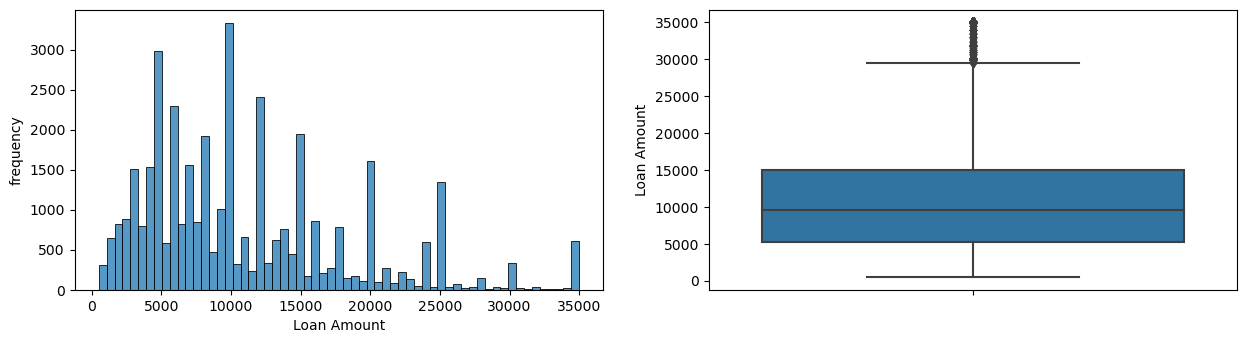

In [108]:
#loan amount
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(x=loan['loan_amnt'])
plt.xlabel('Loan Amount')
plt.ylabel('frequency')

plt.subplot(2,2,2)
sns.boxplot(y=loan['loan_amnt'])
plt.ylabel('Loan Amount')


The loan amount between 5000 - 10000 is requested the most by the loan applicants

Text(0, 0.5, 'Difference frequency on log scale')

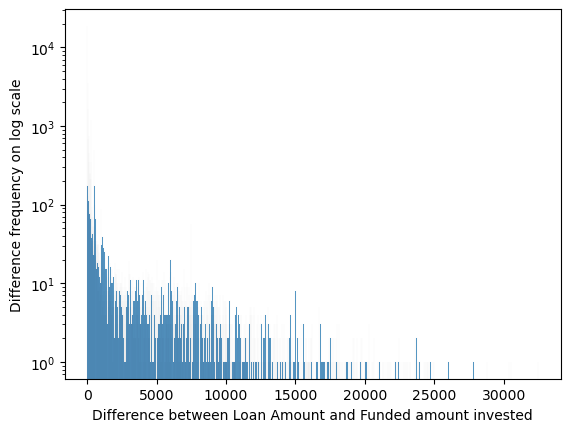

In [194]:
# Checking difference between loan amount requested and loan amount received i.e funded amount invested
diff=sns.histplot(x=loan['loan_amnt']-loan['funded_amnt_inv'])
diff.set_yscale('log')
plt.xlabel('Difference between Loan Amount and Funded amount invested')
plt.ylabel('Difference frequency on log scale')

As we can see that the diffrence bewteen the loan amount and funded amount invested is not huge

Text(0, 0.5, 'Funded Amount Investor')

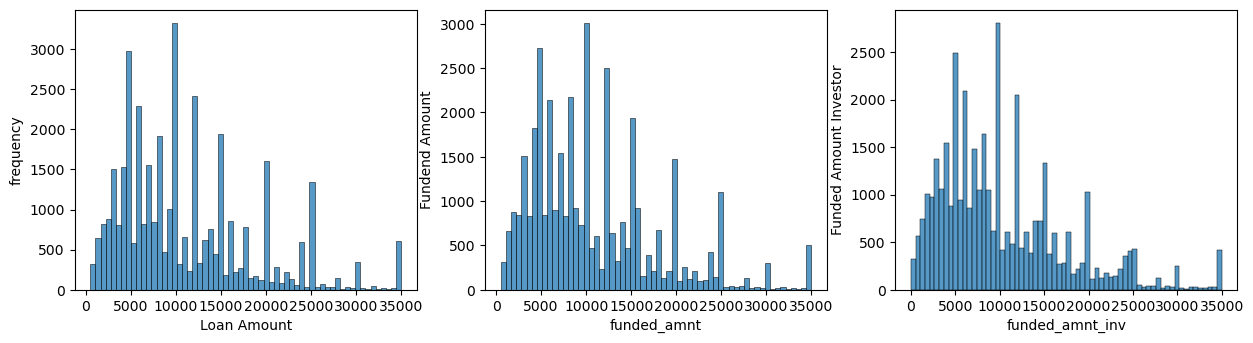

In [109]:
#loan amount vs funded amount vs fundend amount investor
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.histplot(x=loan['loan_amnt'])
plt.xlabel('Loan Amount')
plt.ylabel('frequency')

plt.subplot(2,3,2)
sns.histplot(x=loan['funded_amnt'])
plt.ylabel('Fundend Amount')

plt.subplot(2,3,3)
sns.histplot(x=loan['funded_amnt_inv'])
plt.ylabel('Funded Amount Investor')

To confirm the previous infrence, the distribution of three variables looks the same, we can consider only one of the variables out of these three
and proceed with our anlysis.In our case we have chosen the loan amount variable.

Text(0, 0.5, 'Annual Salary')

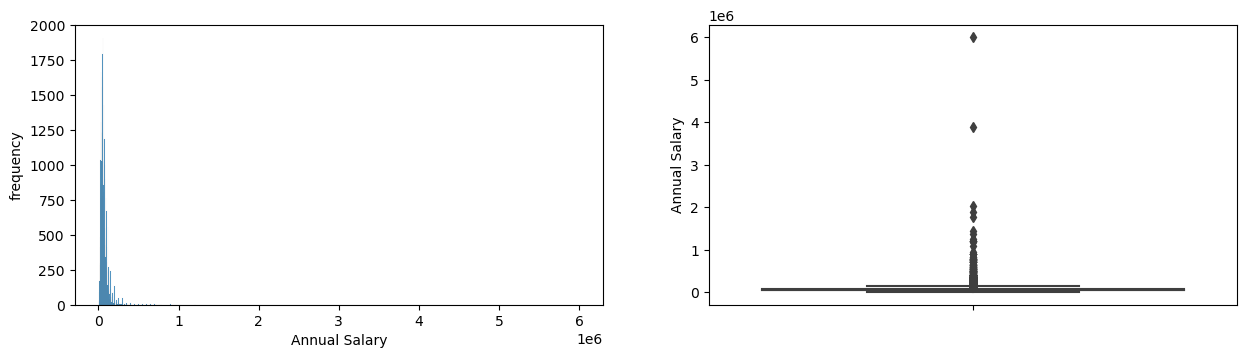

In [110]:
#annual_inc

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(x=loan['annual_inc'])
plt.xlabel('Annual Salary')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.boxplot(y=loan['annual_inc'])
plt.ylabel('Annual Salary')



#### Outlier Treatment
Since there are a lot of outliers in the Annual Slary column, the visualization is nnot proper, therefore let's
remove the outliers and then plot the same graph

In [111]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [112]:
loan['annual_inc'].quantile([.2,.4,.6,.8,.9,.95,.99,1])

0.20      37196.16
0.40      50004.00
0.60      65004.00
0.80      90000.00
0.90     115000.00
0.95     140004.00
0.99     234144.00
1.00    6000000.00
Name: annual_inc, dtype: float64

We can observe that the person with 6000000 annual salary is distorting the plot, therefore lets remove a few outliers

In [113]:
loan=loan[loan['annual_inc']<loan['annual_inc'].quantile(.95)]

Text(0, 0.5, 'Annual Salary')

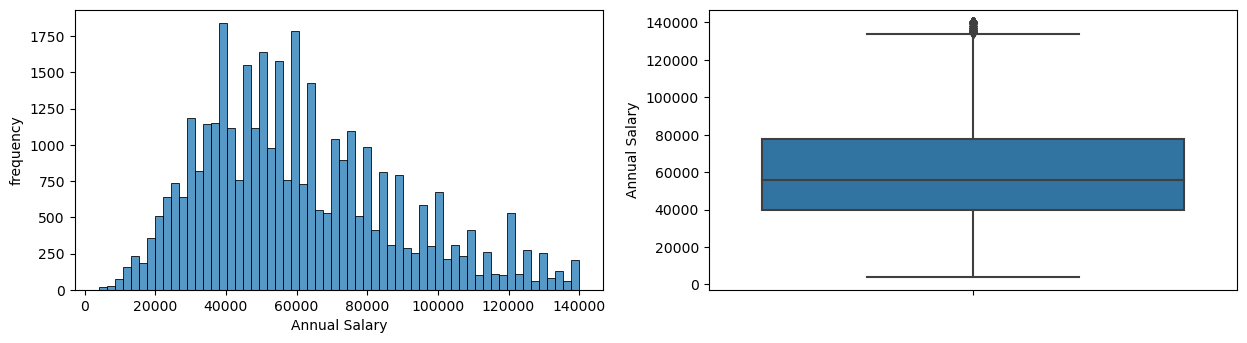

In [114]:
#annual_inc

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(x=loan['annual_inc'])
plt.xlabel('Annual Salary')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.boxplot(y=loan['annual_inc'])
plt.ylabel('Annual Salary')



People with the annual salary between 40000-60000 have applied for the loans the most than the people falling in other salary brackets

Text(0, 0.5, 'Interest Rate')

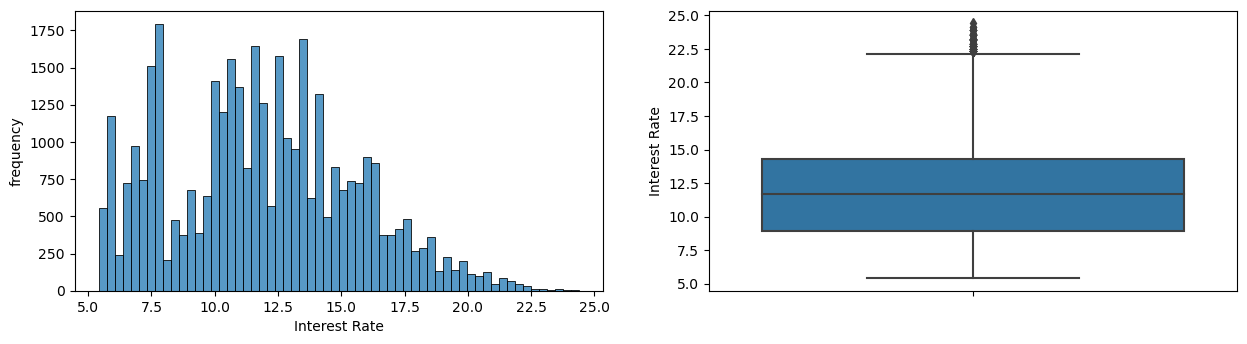

In [115]:
# Interest Rate

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(x=loan['int_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.boxplot(y=loan['int_rate'])
plt.ylabel('Interest Rate')


Most of the applicants interest rate lies between 10 - 14 %


Text(0, 0.5, 'DTI')

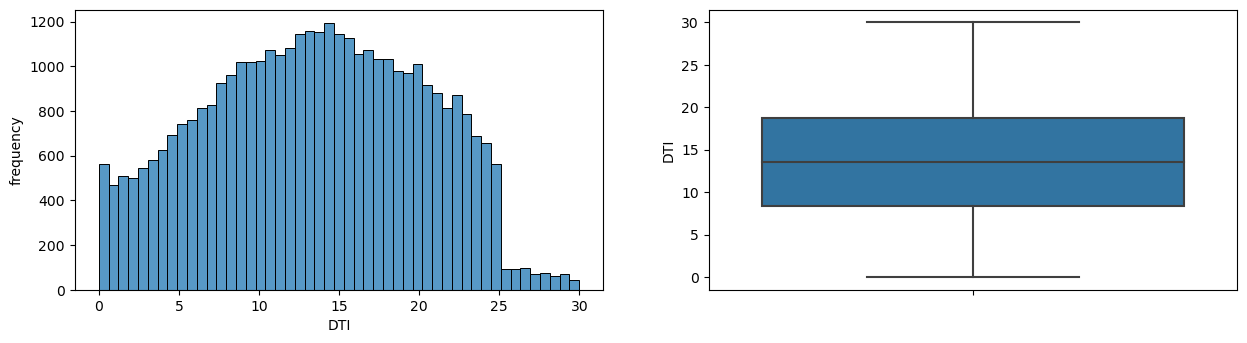

In [116]:
#dti
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(x=loan['dti'])
plt.xlabel('DTI')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.boxplot(y=loan['dti'])
plt.ylabel('DTI')



Most of the people who applied for loan have their DTI between 10 - 15

Text(0, 0.5, 'Installments')

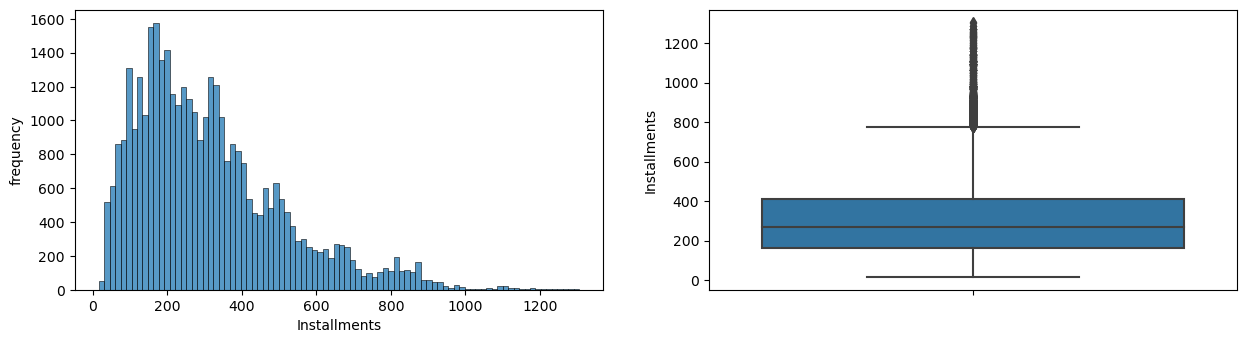

In [117]:
#installments
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(x=loan['installment'])
plt.xlabel('Installments')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.boxplot(y=loan['installment'])
plt.ylabel('Installments')



Most of the loan installments lies bewteen $160 - 300 per month

#### Univariate Analysis on Categorical Variables 




Text(0, 0.5, 'frequency')

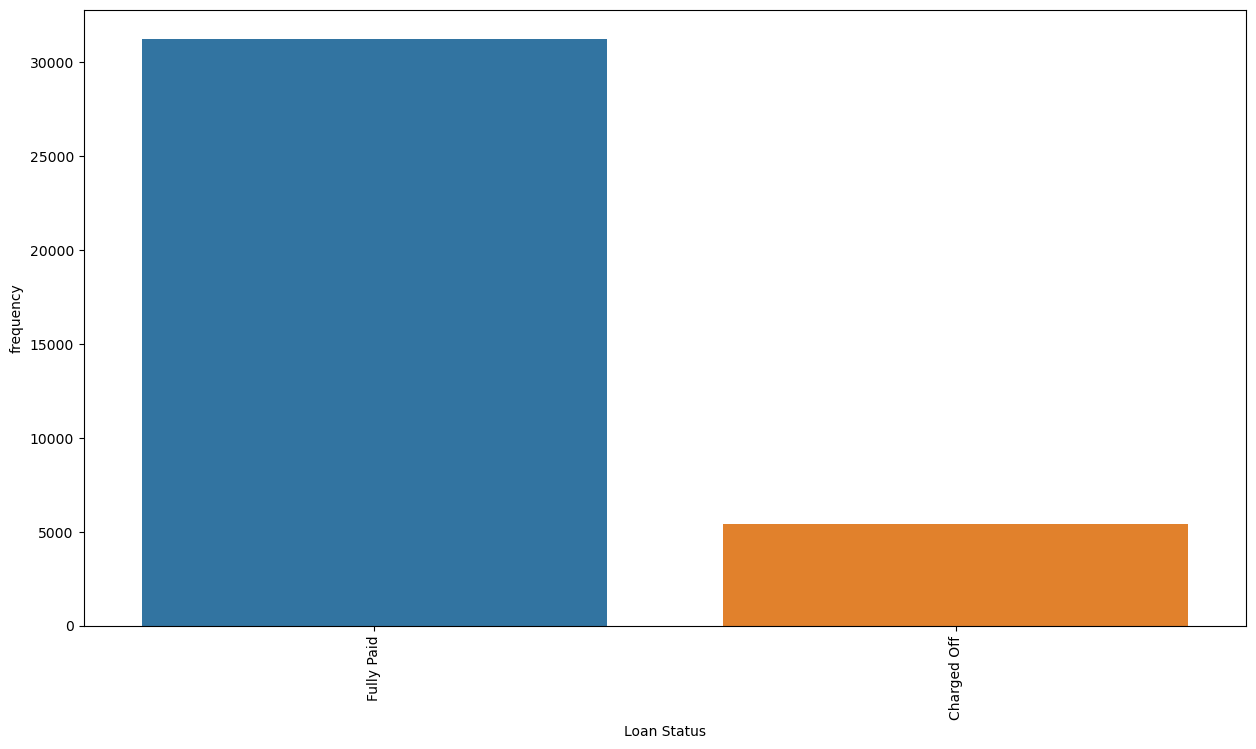

In [118]:
#Loan Status
plt.figure(figsize=(15,8))
sns.countplot(x=loan['loan_status'])
plt.xlabel('Loan Status')
plt.xticks(rotation=90)
plt.ylabel('frequency')



Close to 78 % of the people have fully paid their loan

Text(0, 0.5, 'frequency')

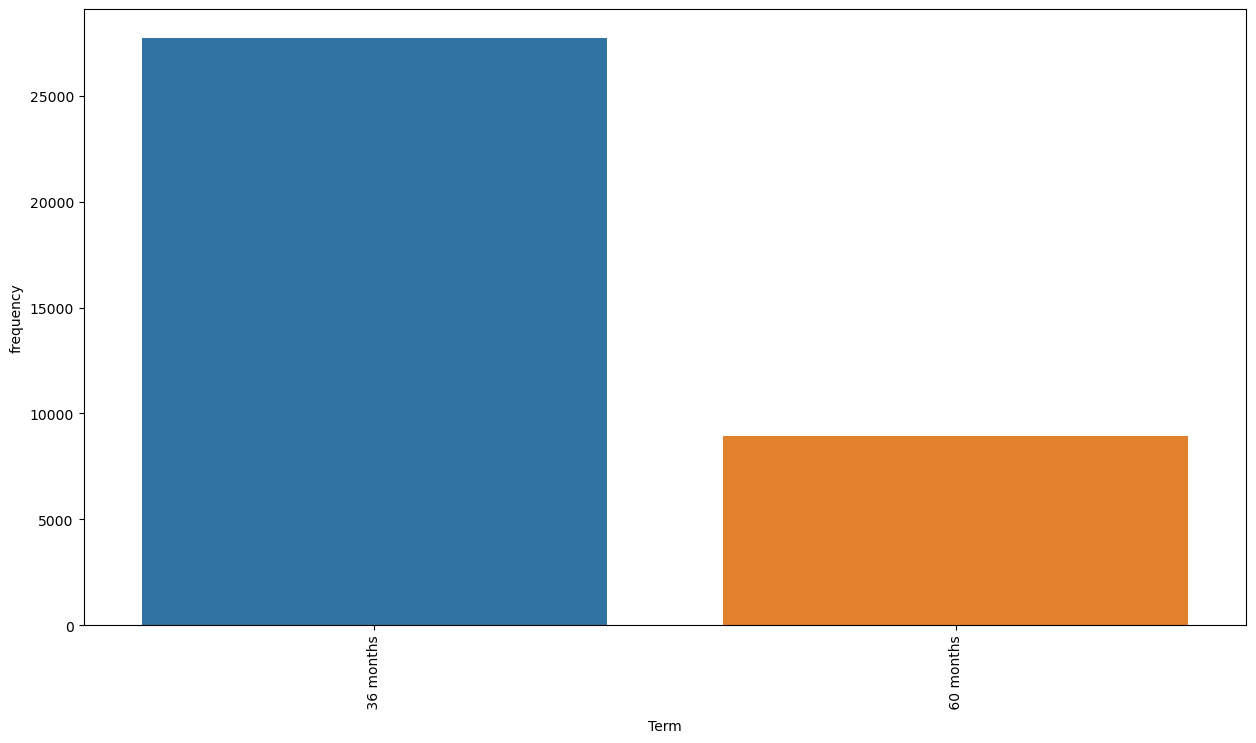

In [119]:


#Term
plt.figure(figsize=(15,8))
sns.countplot(x=loan['term'])
plt.xlabel('Term')
plt.xticks(rotation=90)
plt.ylabel('frequency')

36 months EMI is common amongst the loan applicants

Text(0, 0.5, 'frequency')

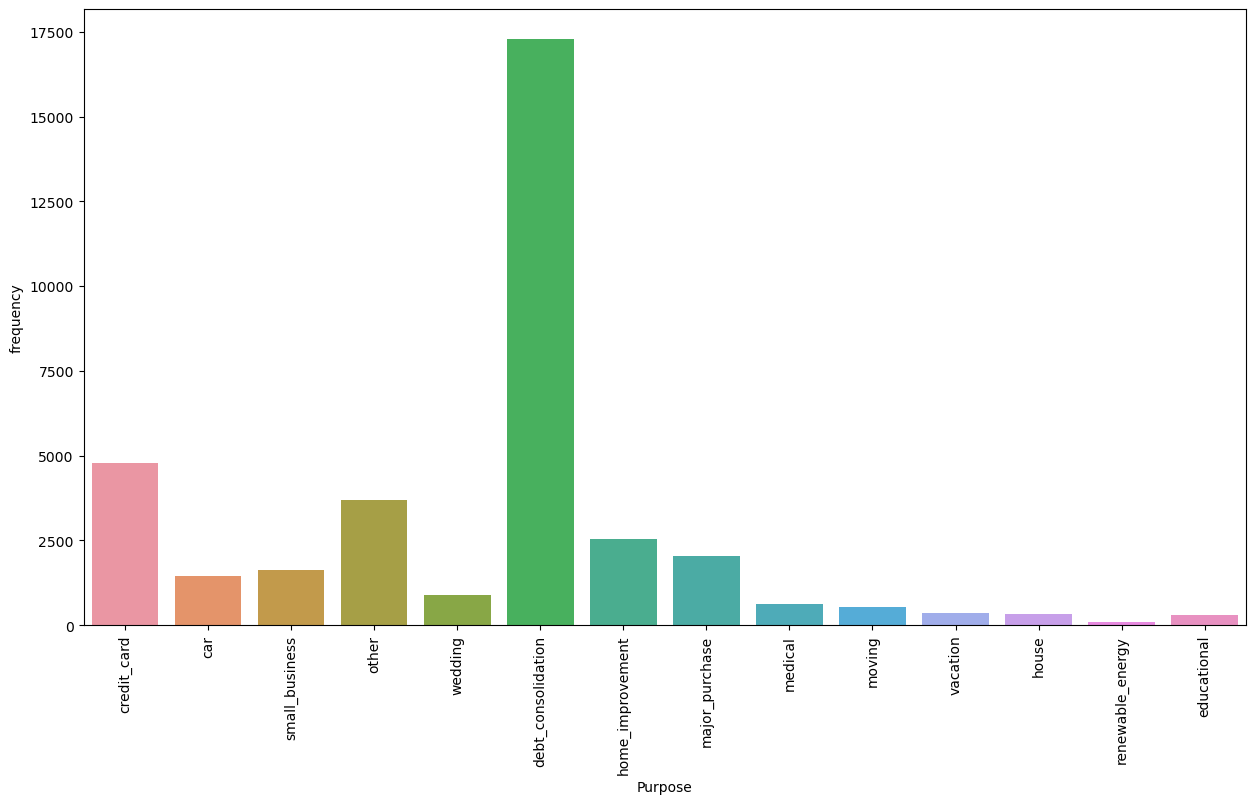

In [120]:

#Purpose
plt.figure(figsize=(15,8))
sns.countplot(x=loan['purpose'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('frequency')

Debt Consolidation leads the purpose race as the reason behind the loan applications

Text(0, 0.5, 'frequency')

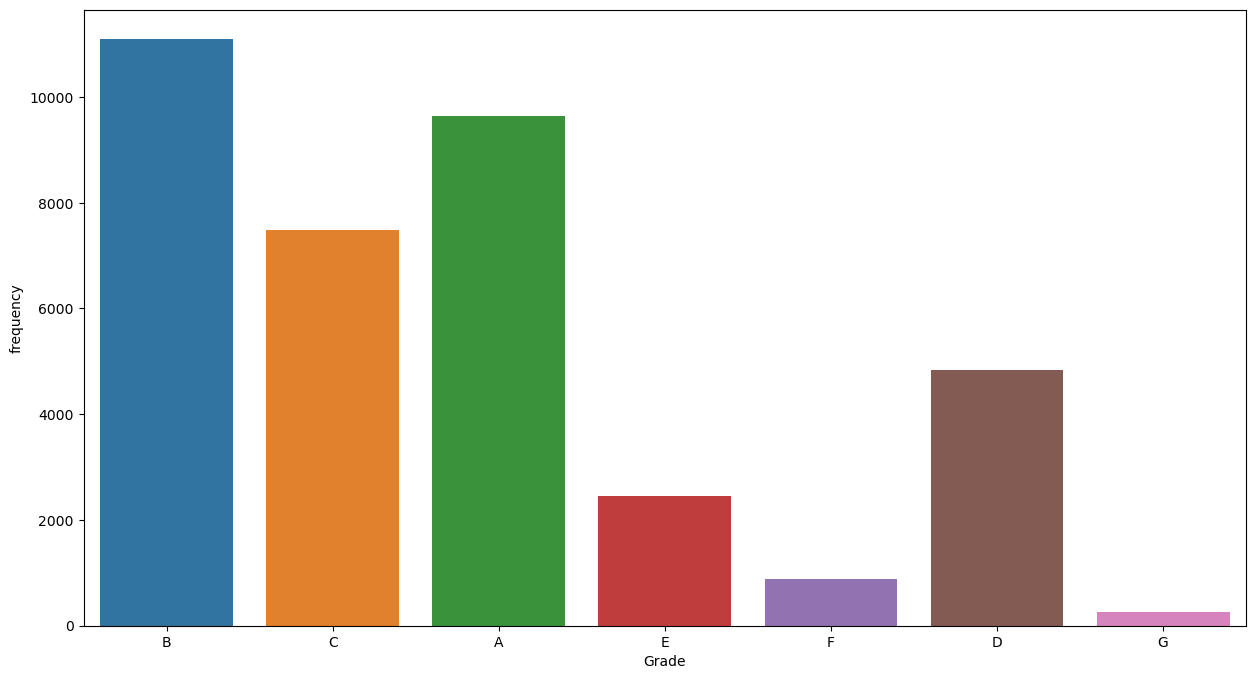

In [121]:
#Grade
plt.figure(figsize=(15,8))

sns.countplot(x=loan['grade'])
plt.xlabel('Grade')
plt.ylabel('frequency')


Lending Club has classified most if it's applicatnts as Grade B and Grade A

Text(0, 0.5, 'frequency')

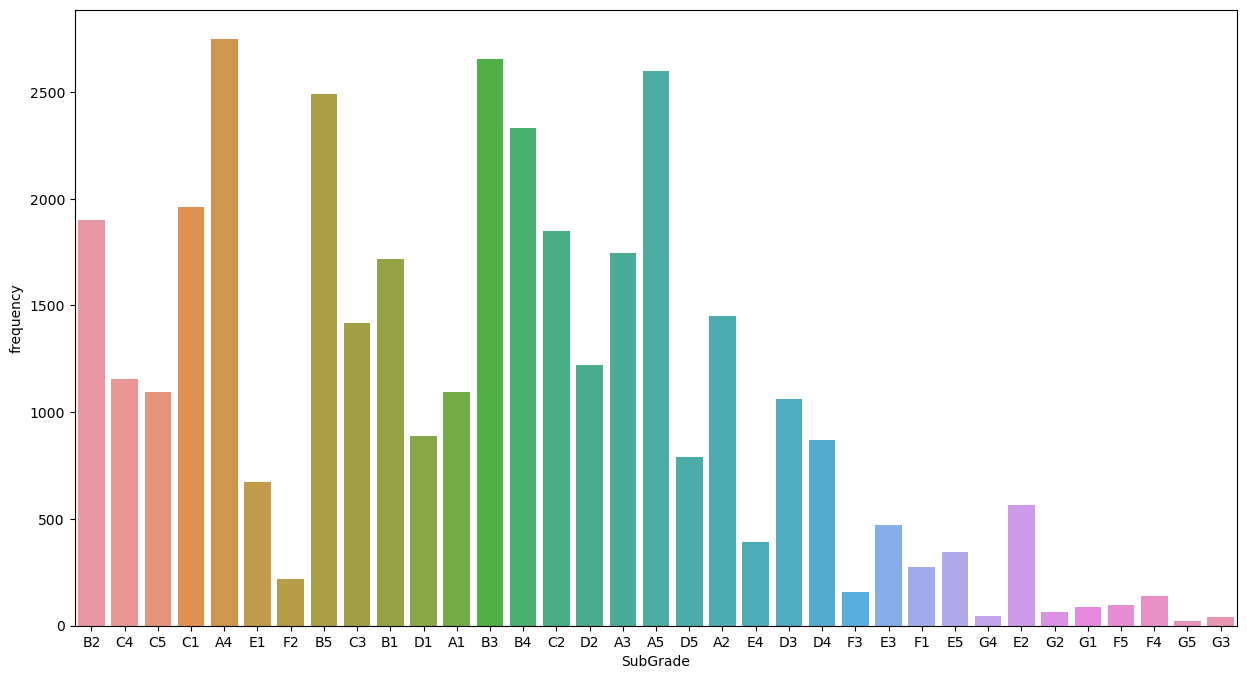

In [122]:
# SubGrade
plt.figure(figsize=(15,8))

sns.countplot(x=loan['sub_grade'])
plt.xlabel('SubGrade')
plt.ylabel('frequency')



There is no such pattern for sub grade that we can assume based on the plot above

Text(0, 0.5, 'Frequency')

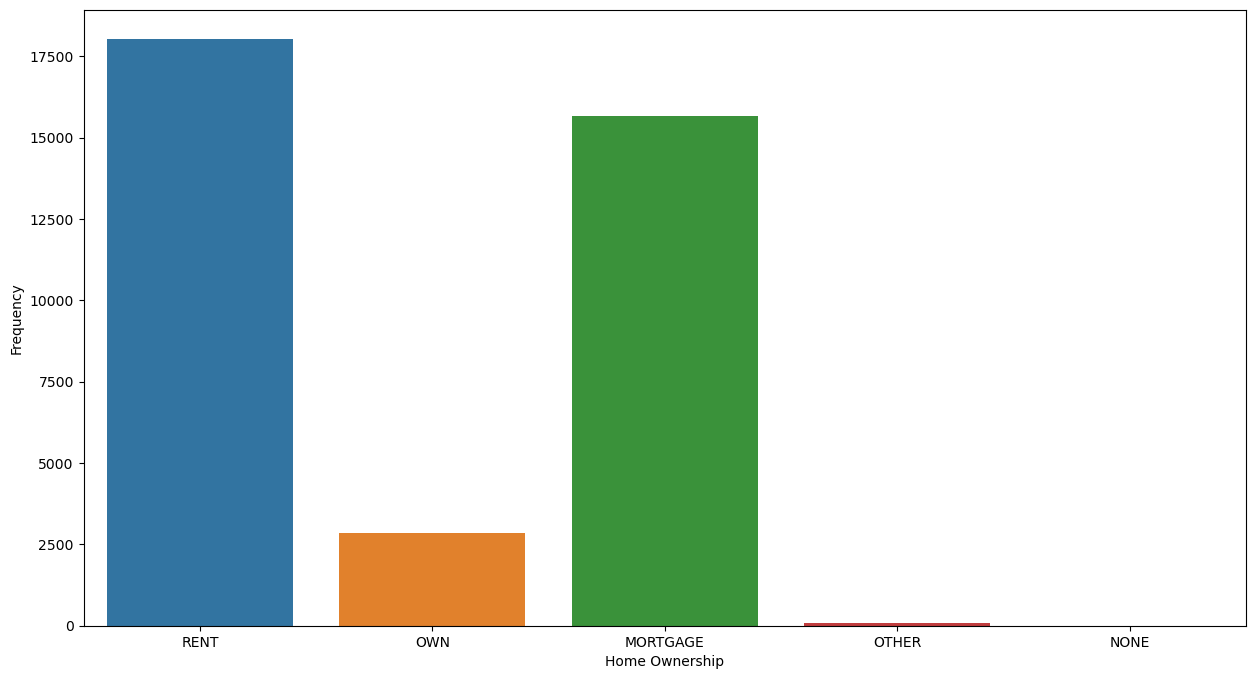

In [123]:
# Home Ownership
plt.figure(figsize=(15,8))

sns.countplot(x=loan['home_ownership'])
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')

Most of the loan applicants are living on a rented property followed by mortgage.

Text(0, 0.5, 'Frequency')

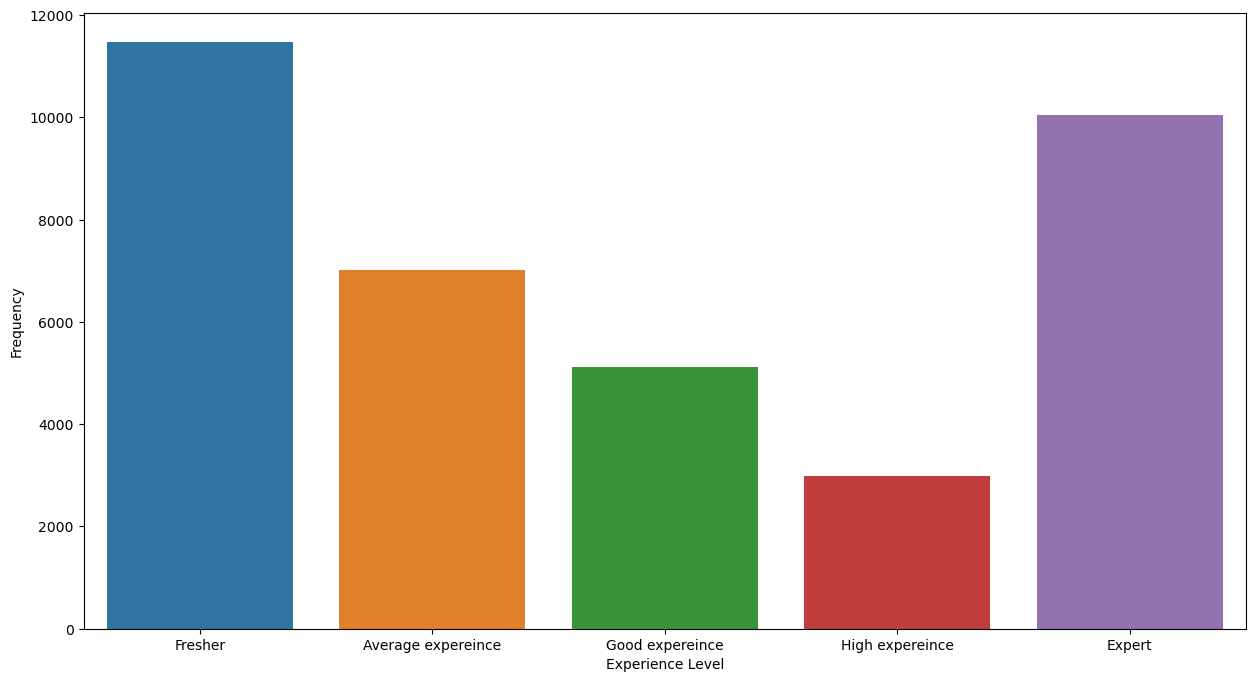

In [124]:
# Home Ownership

plt.figure(figsize=(15,8))

sns.countplot(x=loan['expereince_level'])
plt.xlabel('Experience Level')
plt.ylabel('Frequency')

Most of the applicants are freshers i.e having experience of less than or equal to 2 years followed by experts having more than 10 years of expereince.

Text(0, 0.5, 'frequency')

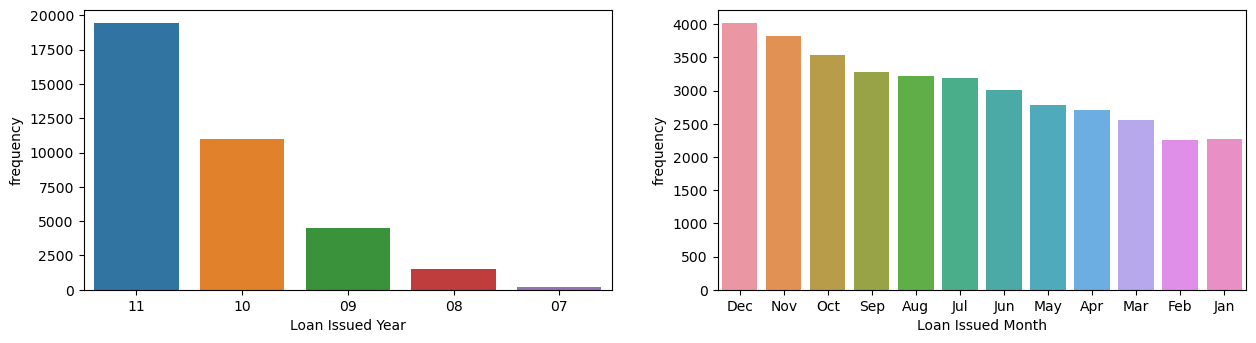

In [125]:
#Loan Issued Year and month

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.countplot(x=loan['issue_d_year'])
plt.xlabel('Loan Issued Year')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.countplot(x=loan['issue_d_month'])
plt.xlabel('Loan Issued Month')
plt.ylabel('frequency')


Number of loan applicants increased over the years with 2011 leading over the other years. December is the most common months for people to apply for a loan

Text(0, 0.5, 'frequency')

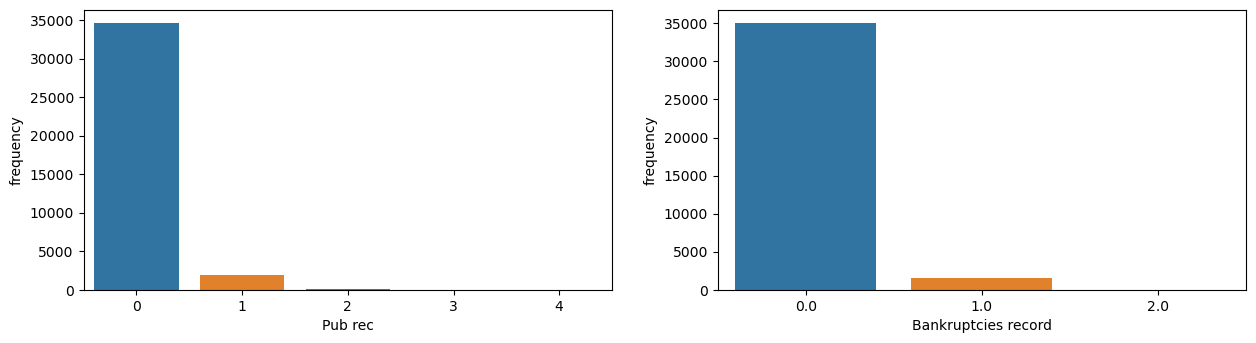

In [188]:
#Pub_rec and pub_rec_bankruptcies

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.countplot(x=loan['pub_rec'])
plt.xlabel('Pub rec')
plt.ylabel('frequency')
plt.subplot(2,2,2)
sns.countplot(x=loan['pub_rec_bankruptcies'])
plt.xlabel('Bankruptcies record')
plt.ylabel('frequency')

Since the plot is not proper as the number of values of 0 in both the plots are huge. Therefore plotting the above graph on logscale

Text(0, 0.5, 'frequency on log scale')

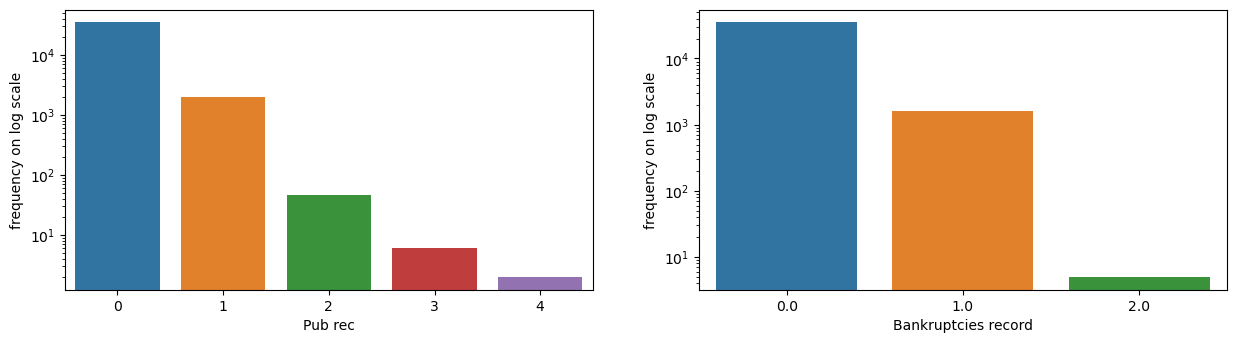

In [193]:
#Pub_rec and pub_rec_bankruptcies

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
pub=sns.countplot(x=loan['pub_rec'])
pub.set_yscale("log")
plt.xlabel('Pub rec')
plt.ylabel('frequency on log scale')
plt.subplot(2,2,2)
rec=sns.countplot(x=loan['pub_rec_bankruptcies'])
rec.set_yscale("log")
plt.xlabel('Bankruptcies record')
plt.ylabel('frequency on log scale')

Almost 85 % have no bad public record or any case of bankruptcies

Text(0, 0.5, 'frequency')

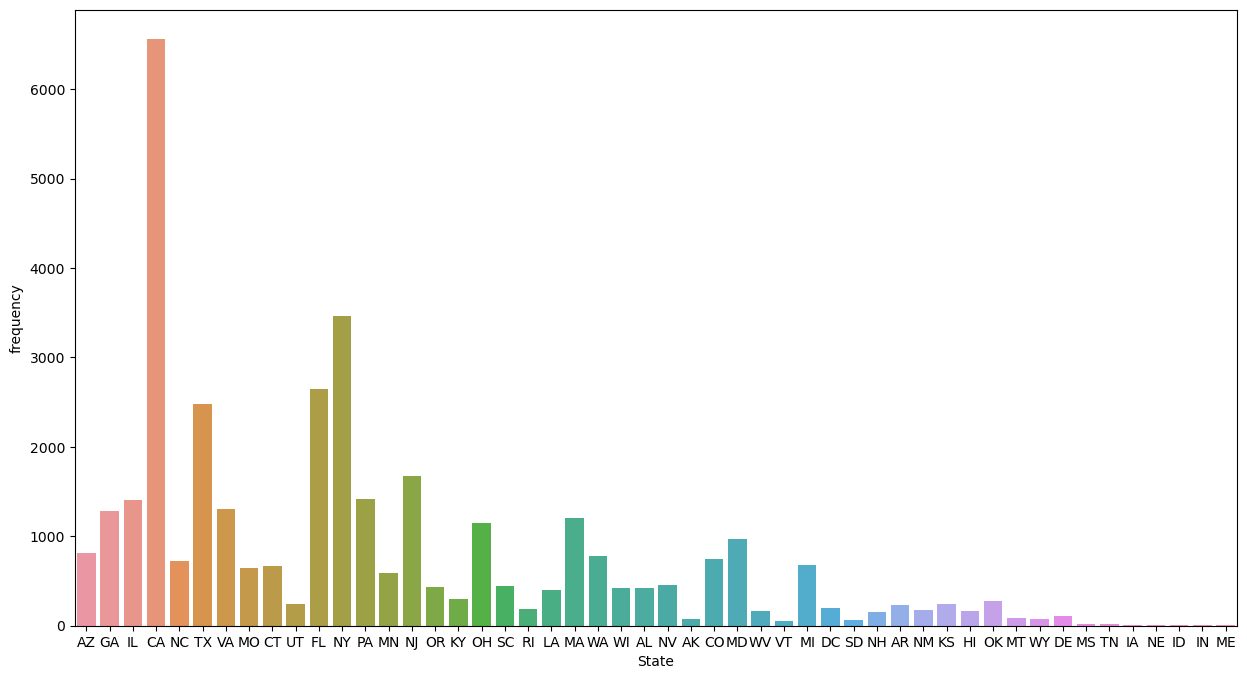

In [127]:
#Address State
plt.figure(figsize=(15,8))
sns.countplot(x=loan['addr_state'])
plt.xlabel('State')
plt.ylabel('frequency')

People from CA state have applied for the loans the most

Text(0, 0.5, 'frequency')

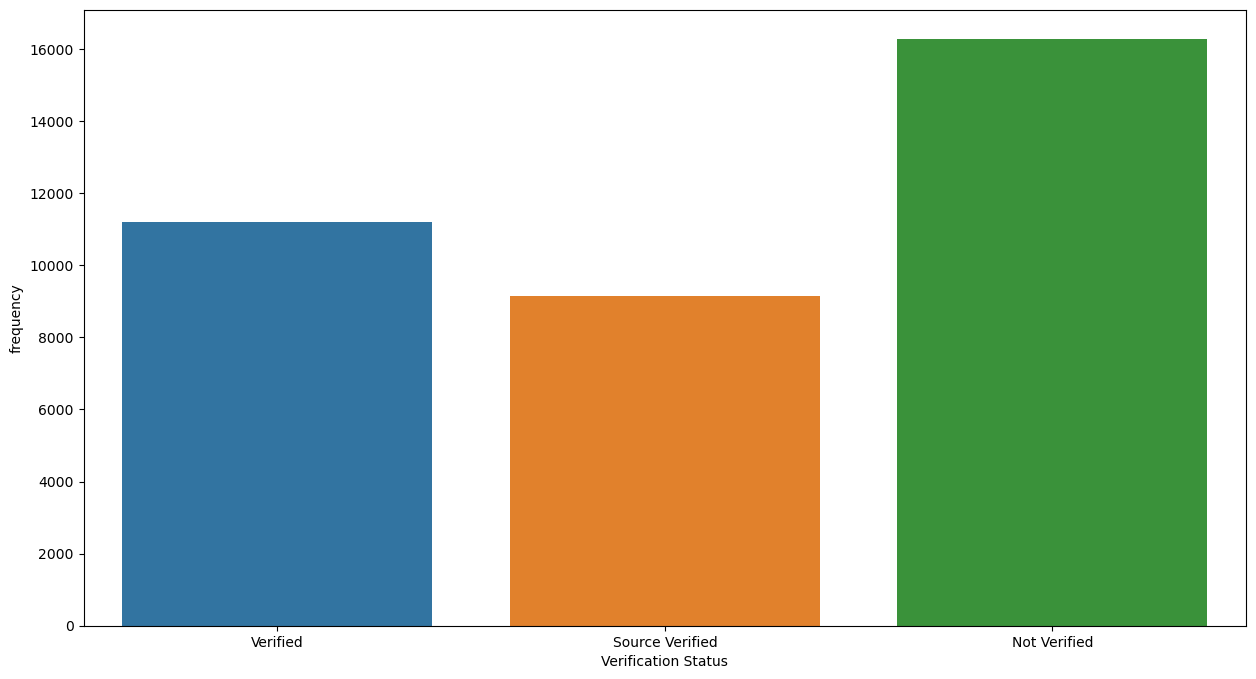

In [180]:
#Verification Status
plt.figure(figsize=(15,8))
sns.countplot(x=loan['verification_status'])
plt.xlabel('Verification Status')
plt.ylabel('frequency')

Most of the applicants are not verified

## Segmented Univariate Analysis


Text(0, 0.5, 'Loan Amount')

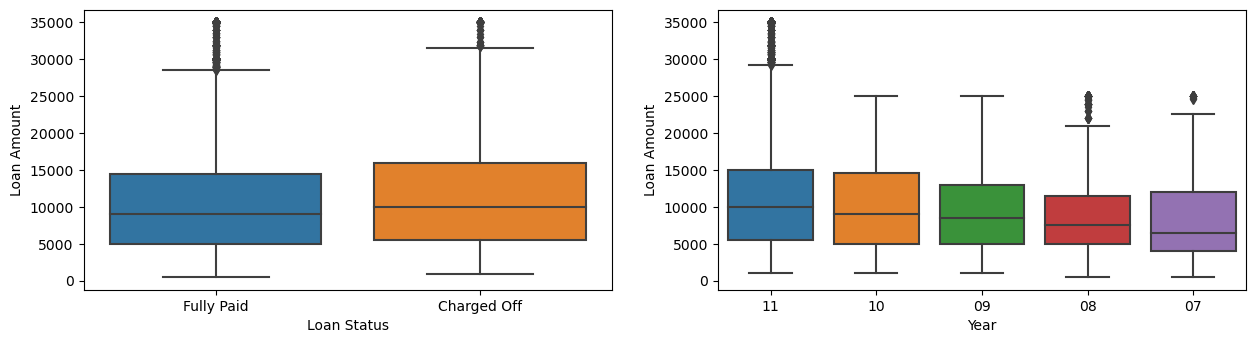

In [128]:
#Loan Status over Loan Amount
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['loan_status'],y=loan['loan_amnt'])
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

#Year of loan issue over Loan Amount
plt.subplot(2,2,2)
sns.boxplot(x=loan['issue_d_year'],y=loan['loan_amnt'])
plt.xlabel('Year')
plt.ylabel('Loan Amount')

While there is no significant difference bewteen the two loan status over the loan amount but the median loan amount has significantly increased over the years with 2011 leading the race.

Text(0, 0.5, 'Loan Amount')

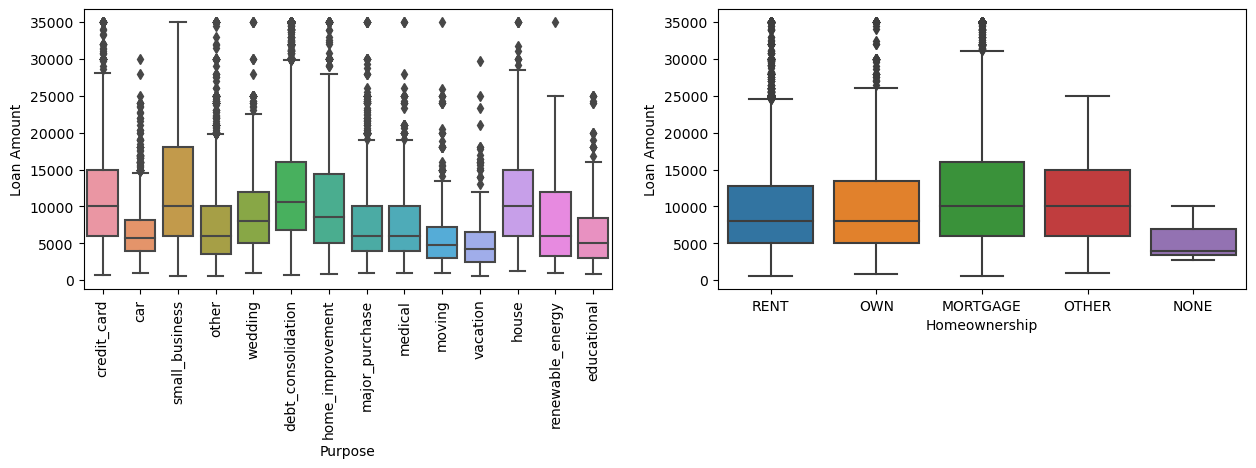

In [129]:
#Purpose over Loan Amount
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['purpose'],y=loan['loan_amnt'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')

#HomeOwnership over Loan Amount
plt.subplot(2,2,2)
sns.boxplot(x=loan['home_ownership'],y=loan['loan_amnt'])
plt.xlabel('Homeownership')
plt.ylabel('Loan Amount')


The median loan amount for small_business is the most,then the second is debt consolidation.
Also, same is the case for people who have homeownership of mortgage.

Text(0, 0.5, 'Loan Amount')

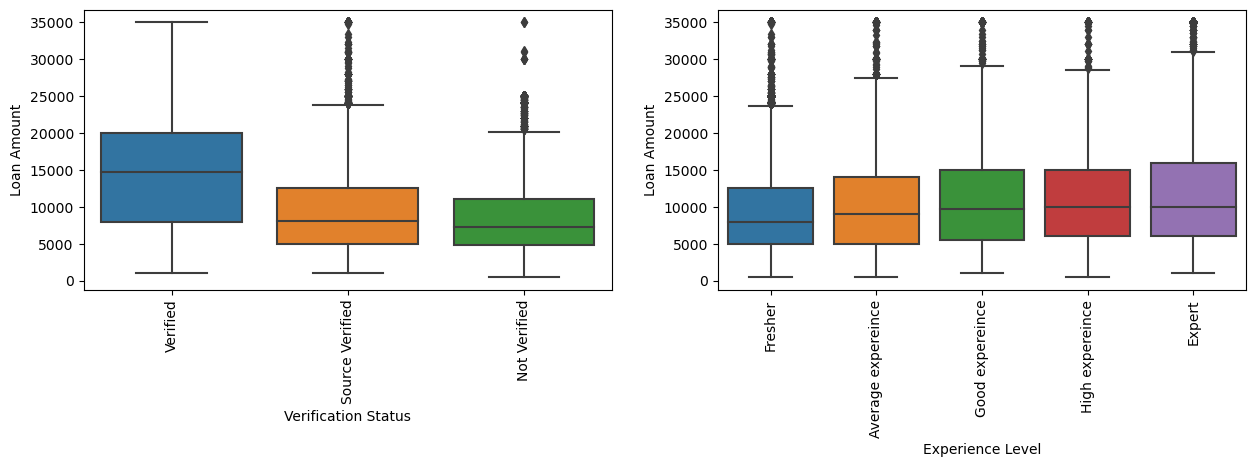

In [130]:
#Verification Status over Loan Amount
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['verification_status'],y=loan['loan_amnt'])
plt.xlabel('Verification Status')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')

#HomeOwnership over Loan Amount
plt.subplot(2,2,2)
sns.boxplot(x=loan['expereince_level'],y=loan['loan_amnt'])
plt.xlabel('Experience Level')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')



The average loan amount for the people who are verified is more than the people who are either souce verified or not verified.
There is no significant increase or decrese in the loan amount for the people based on their years of experience.


Text(0, 0.5, 'Loan Amount')

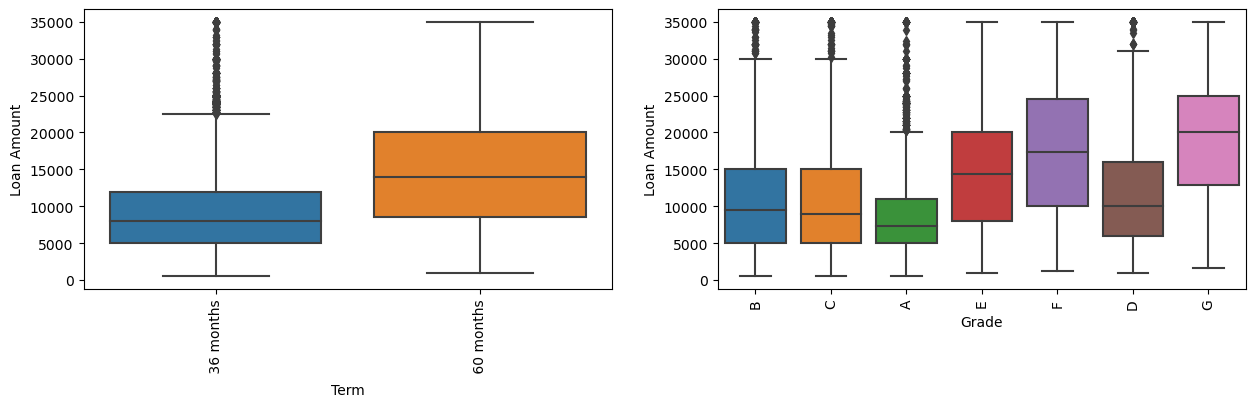

In [131]:
#Term over Loan Amount
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['term'],y=loan['loan_amnt'])
plt.xlabel('Term')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')

#Grade over Loan Amount
plt.subplot(2,2,2)
sns.boxplot(x=loan['grade'],y=loan['loan_amnt'])
plt.xlabel('Grade')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')

When the loan amount is more , people opt for 60 months of term.
Grade 'G' people are having the average loan amount to be greater than the other.

Text(0, 0.5, 'Interest Rate')

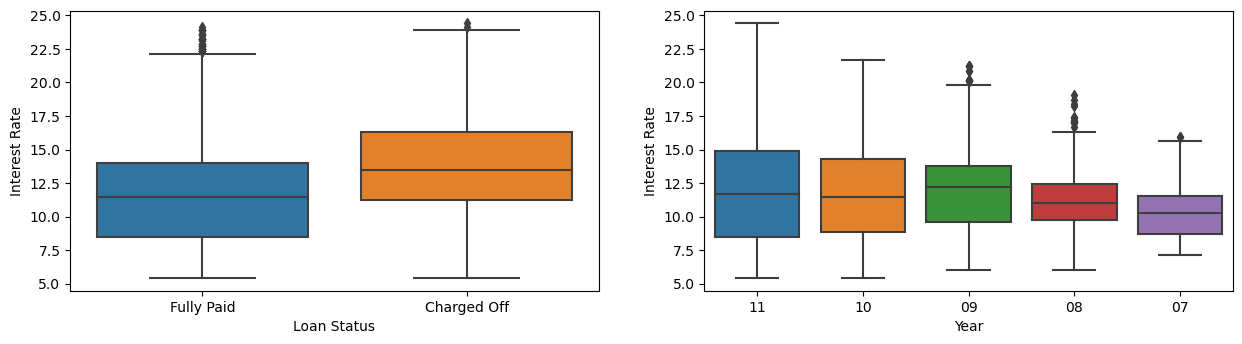

In [132]:
#Loan Status over Interest rate
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['loan_status'],y=loan['int_rate'])
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')

#Year over Interest rate
plt.subplot(2,2,2)
sns.boxplot(x=loan['issue_d_year'],y=loan['int_rate'])
plt.xlabel('Year')
plt.ylabel('Interest Rate')



People with high rate of interest are likely to default.The interest rate in the year 2009 was the most with the mean value of 12.5%

Text(0, 0.5, 'Interest Rate')

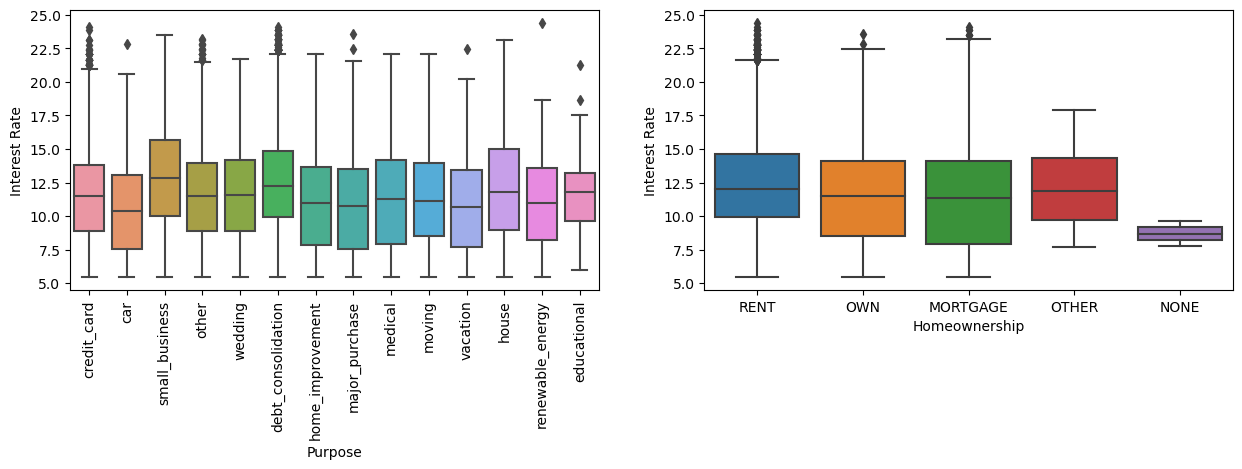

In [133]:
#Purpose over Interest rate
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['purpose'],y=loan['int_rate'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Interest Rate')

#HomeOwnership over Interest rate
plt.subplot(2,2,2)
sns.boxplot(x=loan['home_ownership'],y=loan['int_rate'])
plt.xlabel('Homeownership')
plt.ylabel('Interest Rate')

Average ROI for the loan taken for small business is the most 

Text(0, 0.5, 'Interest rate')

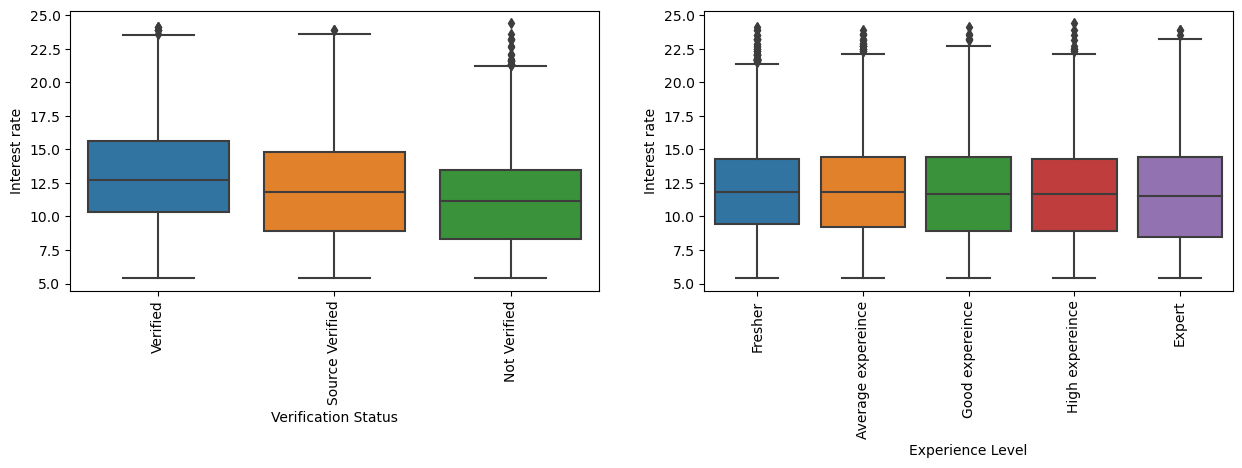

In [134]:
#Verification Status over Interest rate
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['verification_status'],y=loan['int_rate'])
plt.xlabel('Verification Status')
plt.xticks(rotation=90)
plt.ylabel('Interest rate')

#HomeOwnership over Loan Amount
plt.subplot(2,2,2)
sns.boxplot(x=loan['expereince_level'],y=loan['int_rate'])
plt.xlabel('Experience Level')
plt.xticks(rotation=90)
plt.ylabel('Interest rate')

ROI is more for the people who have the verified,while there is no such diffrenece in ROI based on the level of experience.

Text(0, 0.5, 'Interest Rate')

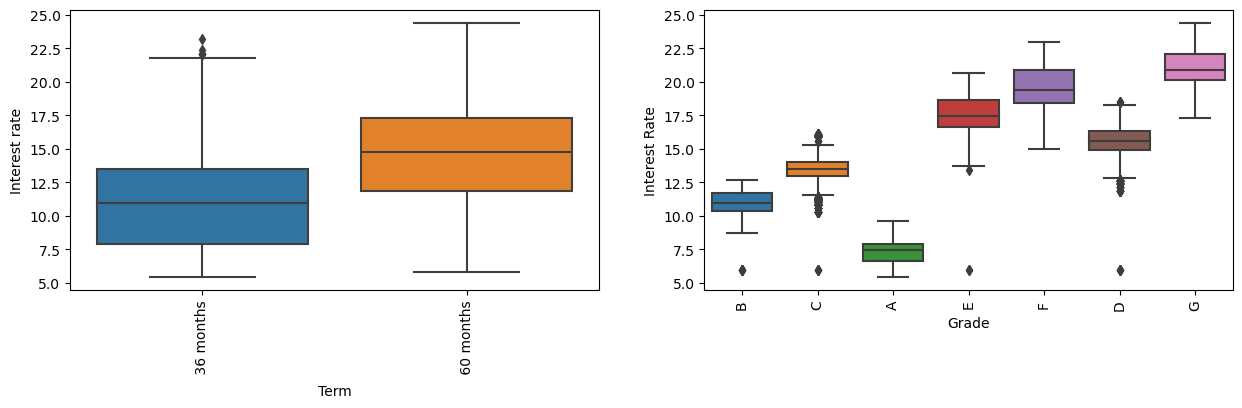

In [135]:

#Term over Interest rate
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['term'],y=loan['int_rate'])
plt.xlabel('Term')
plt.xticks(rotation=90)
plt.ylabel('Interest rate')

#Grade over Interest rate
plt.subplot(2,2,2)
sns.boxplot(x=loan['grade'],y=loan['int_rate'])
plt.xlabel('Grade')
plt.xticks(rotation=90)
plt.ylabel('Interest Rate')

The rate of interest on 60 months term is more than that of 36 months term. Also, the average ROI is less for grade A applicants while grade G have the highest

Text(0, 0.5, 'Interest rates')

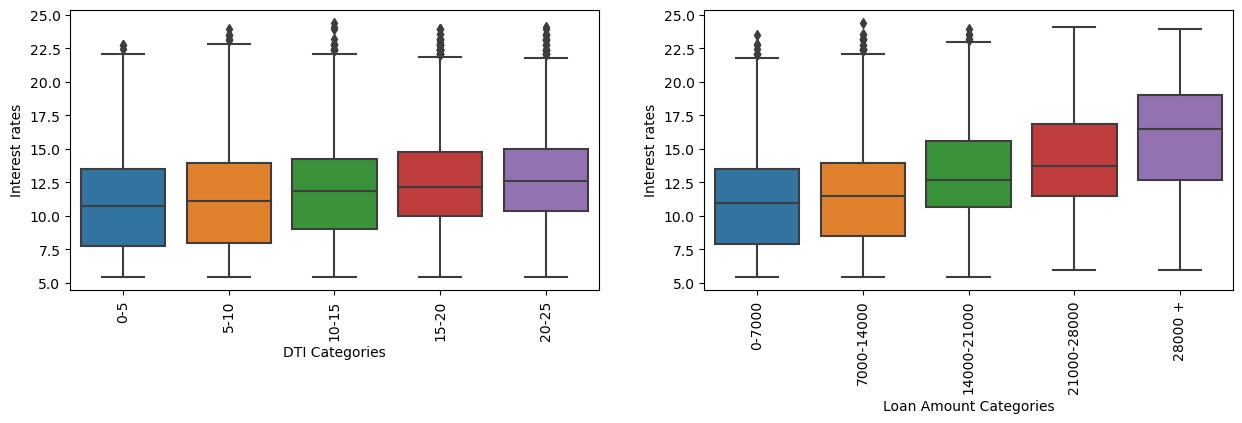

In [136]:
#int rate over DTI Categories
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['dti_cats'],y=loan['int_rate'])
plt.xlabel('DTI Categories')
plt.xticks(rotation=90)
plt.ylabel('Interest rates')


#int rate over loan amount categories
plt.subplot(2,2,2)
sns.boxplot(x=loan['loan_amnt_cats'],y=loan['int_rate'])
plt.xlabel('Loan Amount Categories')
plt.xticks(rotation=90)
plt.ylabel('Interest rates')

There is a significant increase in the ROI as the loan amount increases 

Text(0, 0.5, 'Annual Salary')

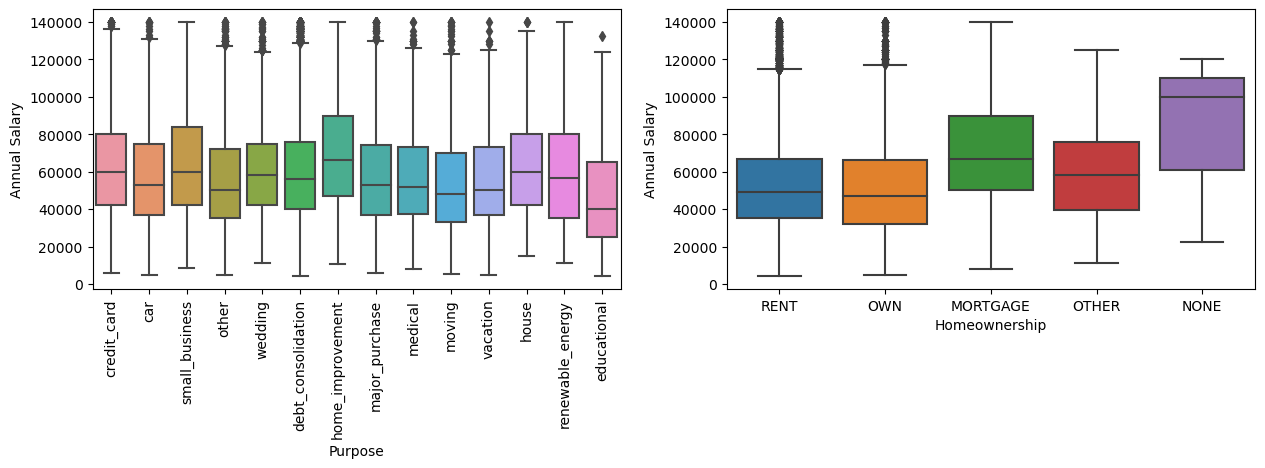

In [137]:
#Purpose over Annual Salary
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['purpose'],y=loan['annual_inc'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Annual Salary')

#HomeOwnership over Annual Salary
plt.subplot(2,2,2)
sns.boxplot(x=loan['home_ownership'],y=loan['annual_inc'])
plt.xlabel('Homeownership')
plt.ylabel('Annual Salary')

People who have higher annual salary tend to take loan for home improvement the most and have mortgage as homeownership. 

Text(0, 0.5, 'Annual Salary')

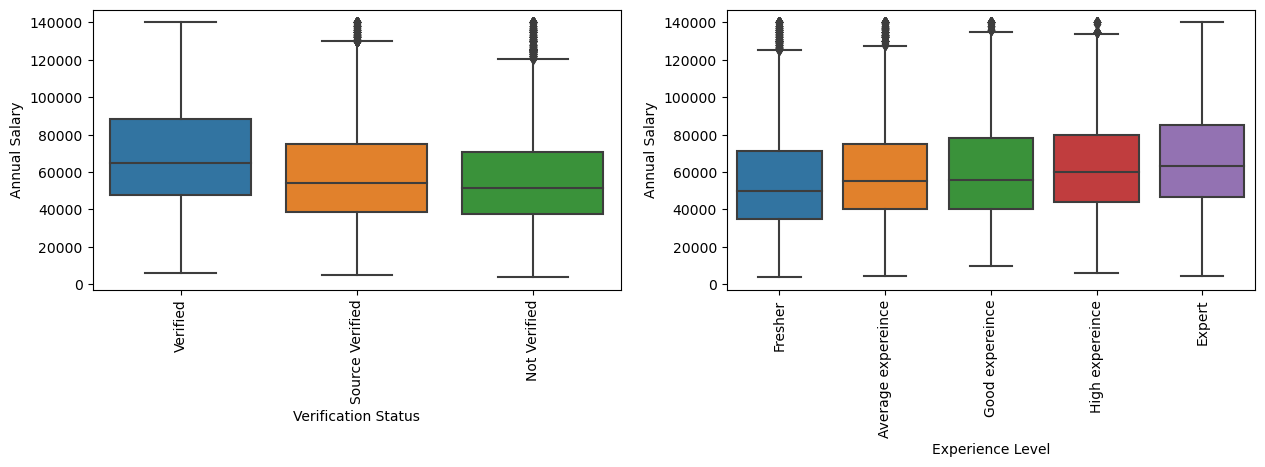

In [138]:
#Verification Status over Annual Salary
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['verification_status'],y=loan['annual_inc'])
plt.xlabel('Verification Status')
plt.xticks(rotation=90)
plt.ylabel('Annual Salary')

#HomeOwnership over Annual Salary
plt.subplot(2,2,2)
sns.boxplot(x=loan['expereince_level'],y=loan['annual_inc'])
plt.xlabel('Experience Level')
plt.xticks(rotation=90)
plt.ylabel('Annual Salary')

Annual salary of the people who are verified applicants is the most. The experience level plot shows that the average annual salary increase with the year of experience. 

Text(0, 0.5, 'DTI')

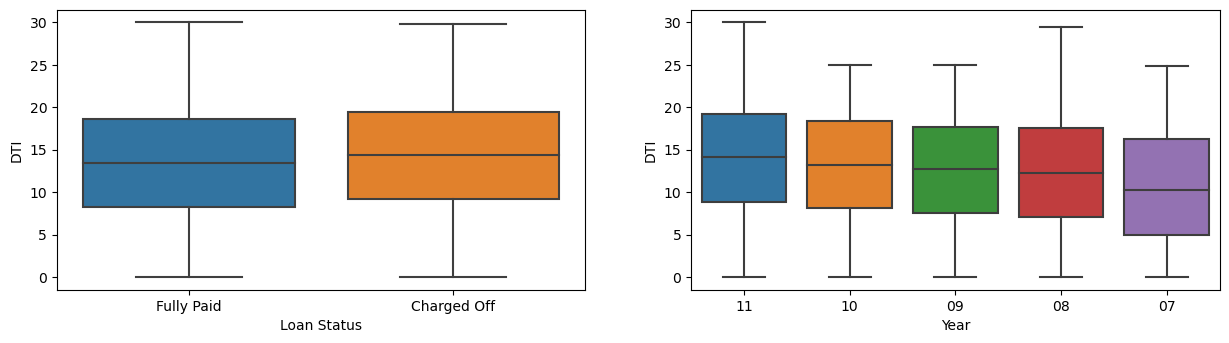

In [139]:
#Loan Status over DTI
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['loan_status'],y=loan['dti'])
plt.xlabel('Loan Status')
plt.ylabel('DTI')

#Year of loan issue over DTI
plt.subplot(2,2,2)
sns.boxplot(x=loan['issue_d_year'],y=loan['dti'])
plt.xlabel('Year')
plt.ylabel('DTI')

While there is no significant differnece in the DTI for the loan status ,the plot on the right shows that the average DTI amongst the loan applicants has increased over the year.

Text(0, 0.5, 'DTI')

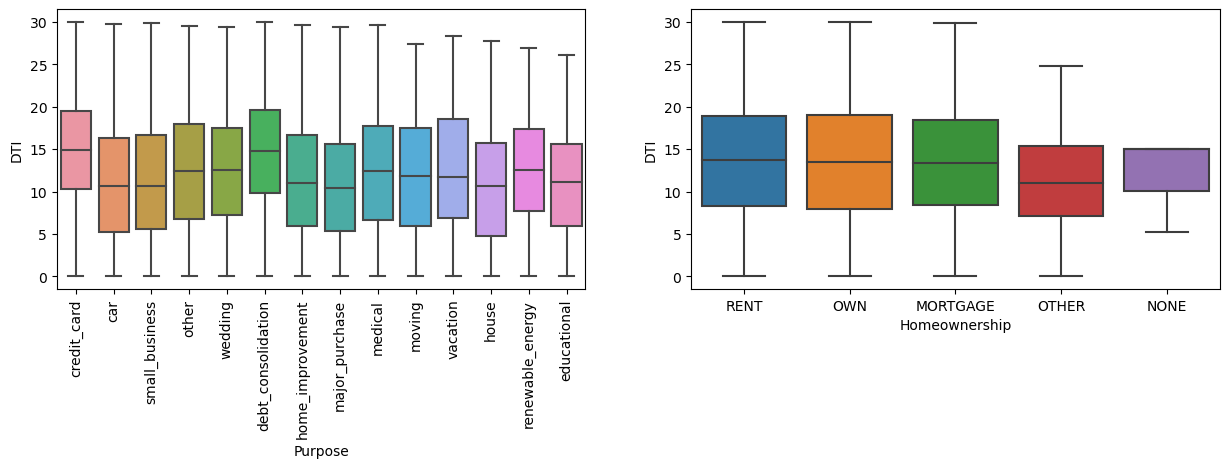

In [140]:
#Purpose over DTI
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['purpose'],y=loan['dti'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('DTI')

#HomeOwnership over DTI
plt.subplot(2,2,2)
sns.boxplot(x=loan['home_ownership'],y=loan['dti'])
plt.xlabel('Homeownership')
plt.ylabel('DTI')

People who took loan for the purpose of debt_Consolidation have higher DTI, while there is no significant difference in DTI in terms of homeownership. 

Text(0, 0.5, 'DTI')

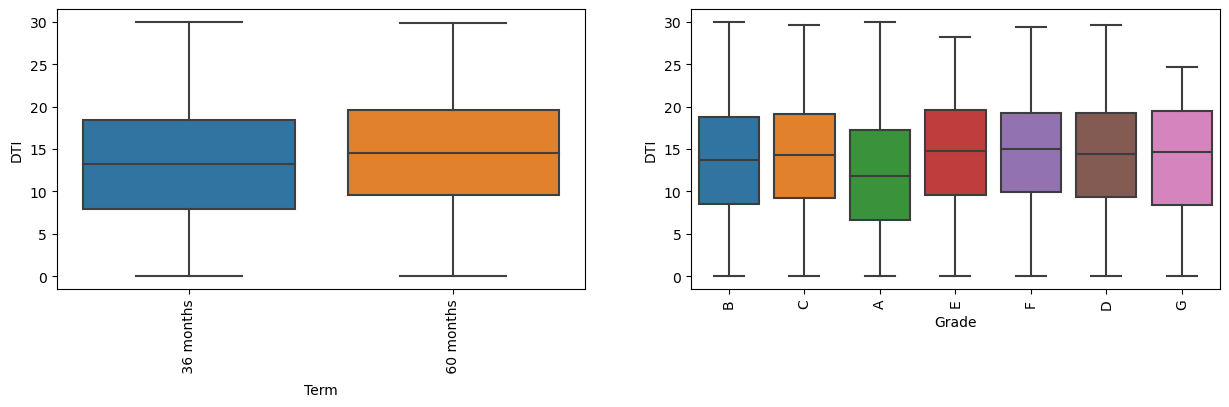

In [141]:
#Term over DTI
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['term'],y=loan['dti'])
plt.xlabel('Term')
plt.xticks(rotation=90)
plt.ylabel('DTI')

#Grade over DTI
plt.subplot(2,2,2)
sns.boxplot(x=loan['grade'],y=loan['dti'])
plt.xlabel('Grade')
plt.xticks(rotation=90)
plt.ylabel('DTI')



There is a slight difference in the DTI of a 36 months tenure applicants as compared to 60 month term.
DTI of grade A customer is the lowest.

Text(0, 0.5, 'DTI')

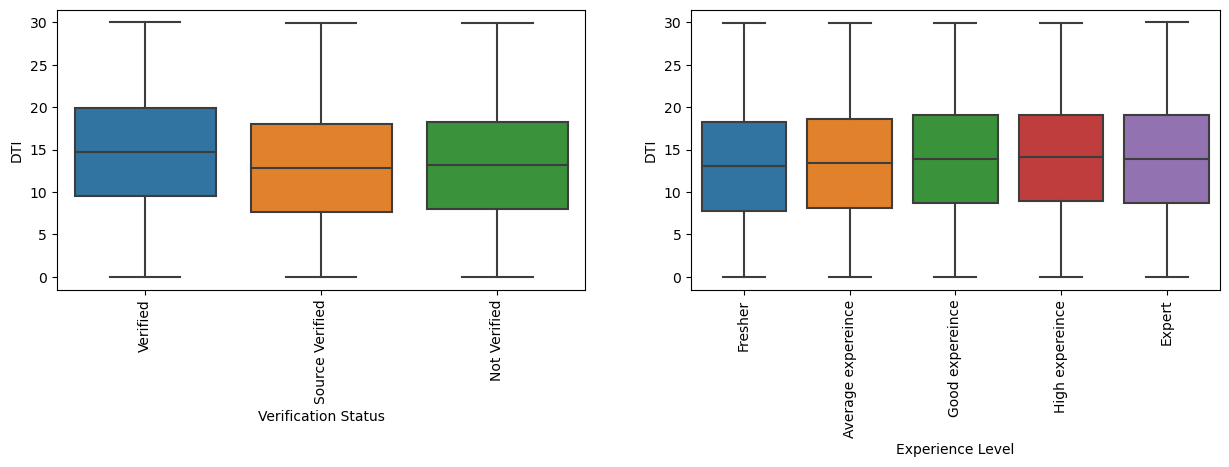

In [142]:
#Verification Status over DTI
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['verification_status'],y=loan['dti'])
plt.xlabel('Verification Status')
plt.xticks(rotation=90)
plt.ylabel('DTI')

#HomeOwnership over DTI
plt.subplot(2,2,2)
sns.boxplot(x=loan['expereince_level'],y=loan['dti'])
plt.xlabel('Experience Level')
plt.xticks(rotation=90)
plt.ylabel('DTI')

DTI of verified people is slightly more than the source verified and not verified. While there is no signifcant differnce in dti for various expereince level




Text(0, 0.5, 'Installments')

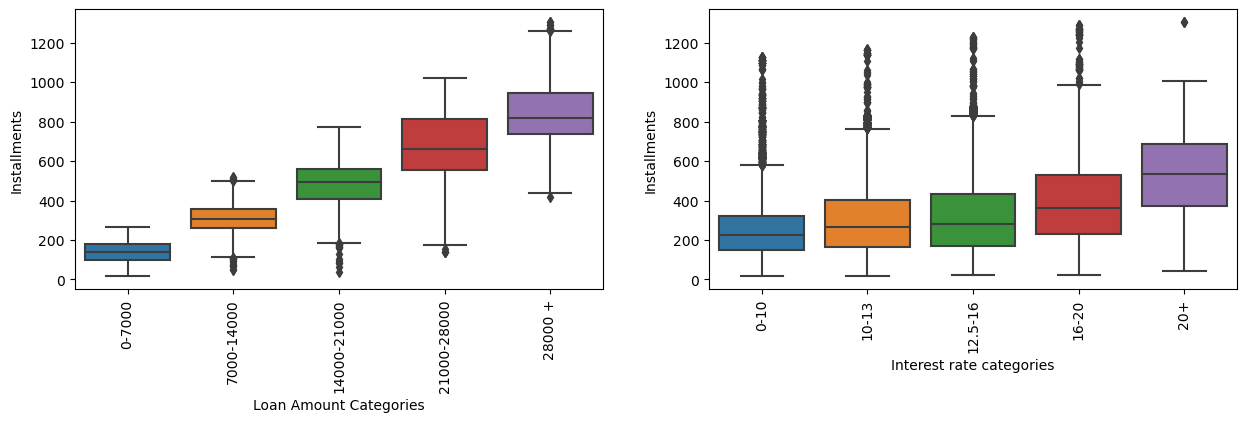

In [143]:
#Installments over Loan amount
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan['loan_amnt_cats'],y=loan['installment'])
plt.xlabel('Loan Amount Categories')
plt.xticks(rotation=90)
plt.ylabel('Installments')

#Installments over interest rate 
plt.subplot(2,2,2)
sns.boxplot(x=loan['int_rate_cats'],y=loan['installment'])
plt.xlabel('Interest rate categories')
plt.xticks(rotation=90)
plt.ylabel('Installments')

Installemnts increase with the increase in the loan amount and interest rate

# Bivariate Analysis

<Axes: >

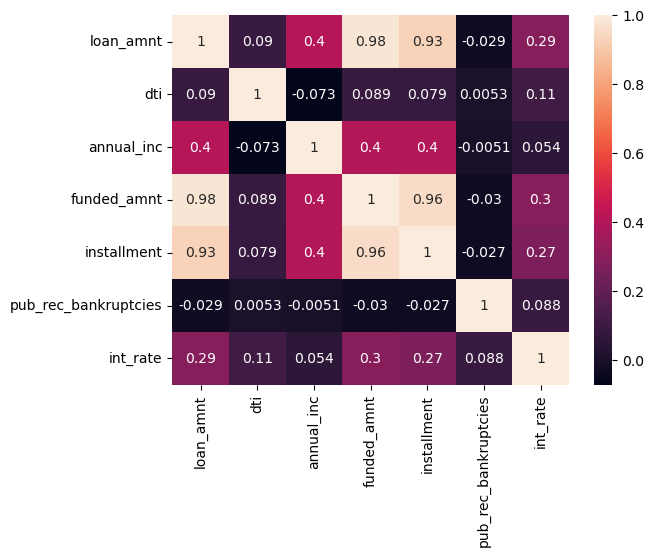

In [144]:
#HeatMap
sns.heatmap(loan[['loan_amnt','dti','annual_inc','funded_amnt','installment','pub_rec_bankruptcies','int_rate']].corr(),annot=True)



Funded amount is strongly correlated with loan amount and installments.
DTI is negatively correlated to the annual salary i.e if the annual salary is less then the DTI is more (montly debts are more)

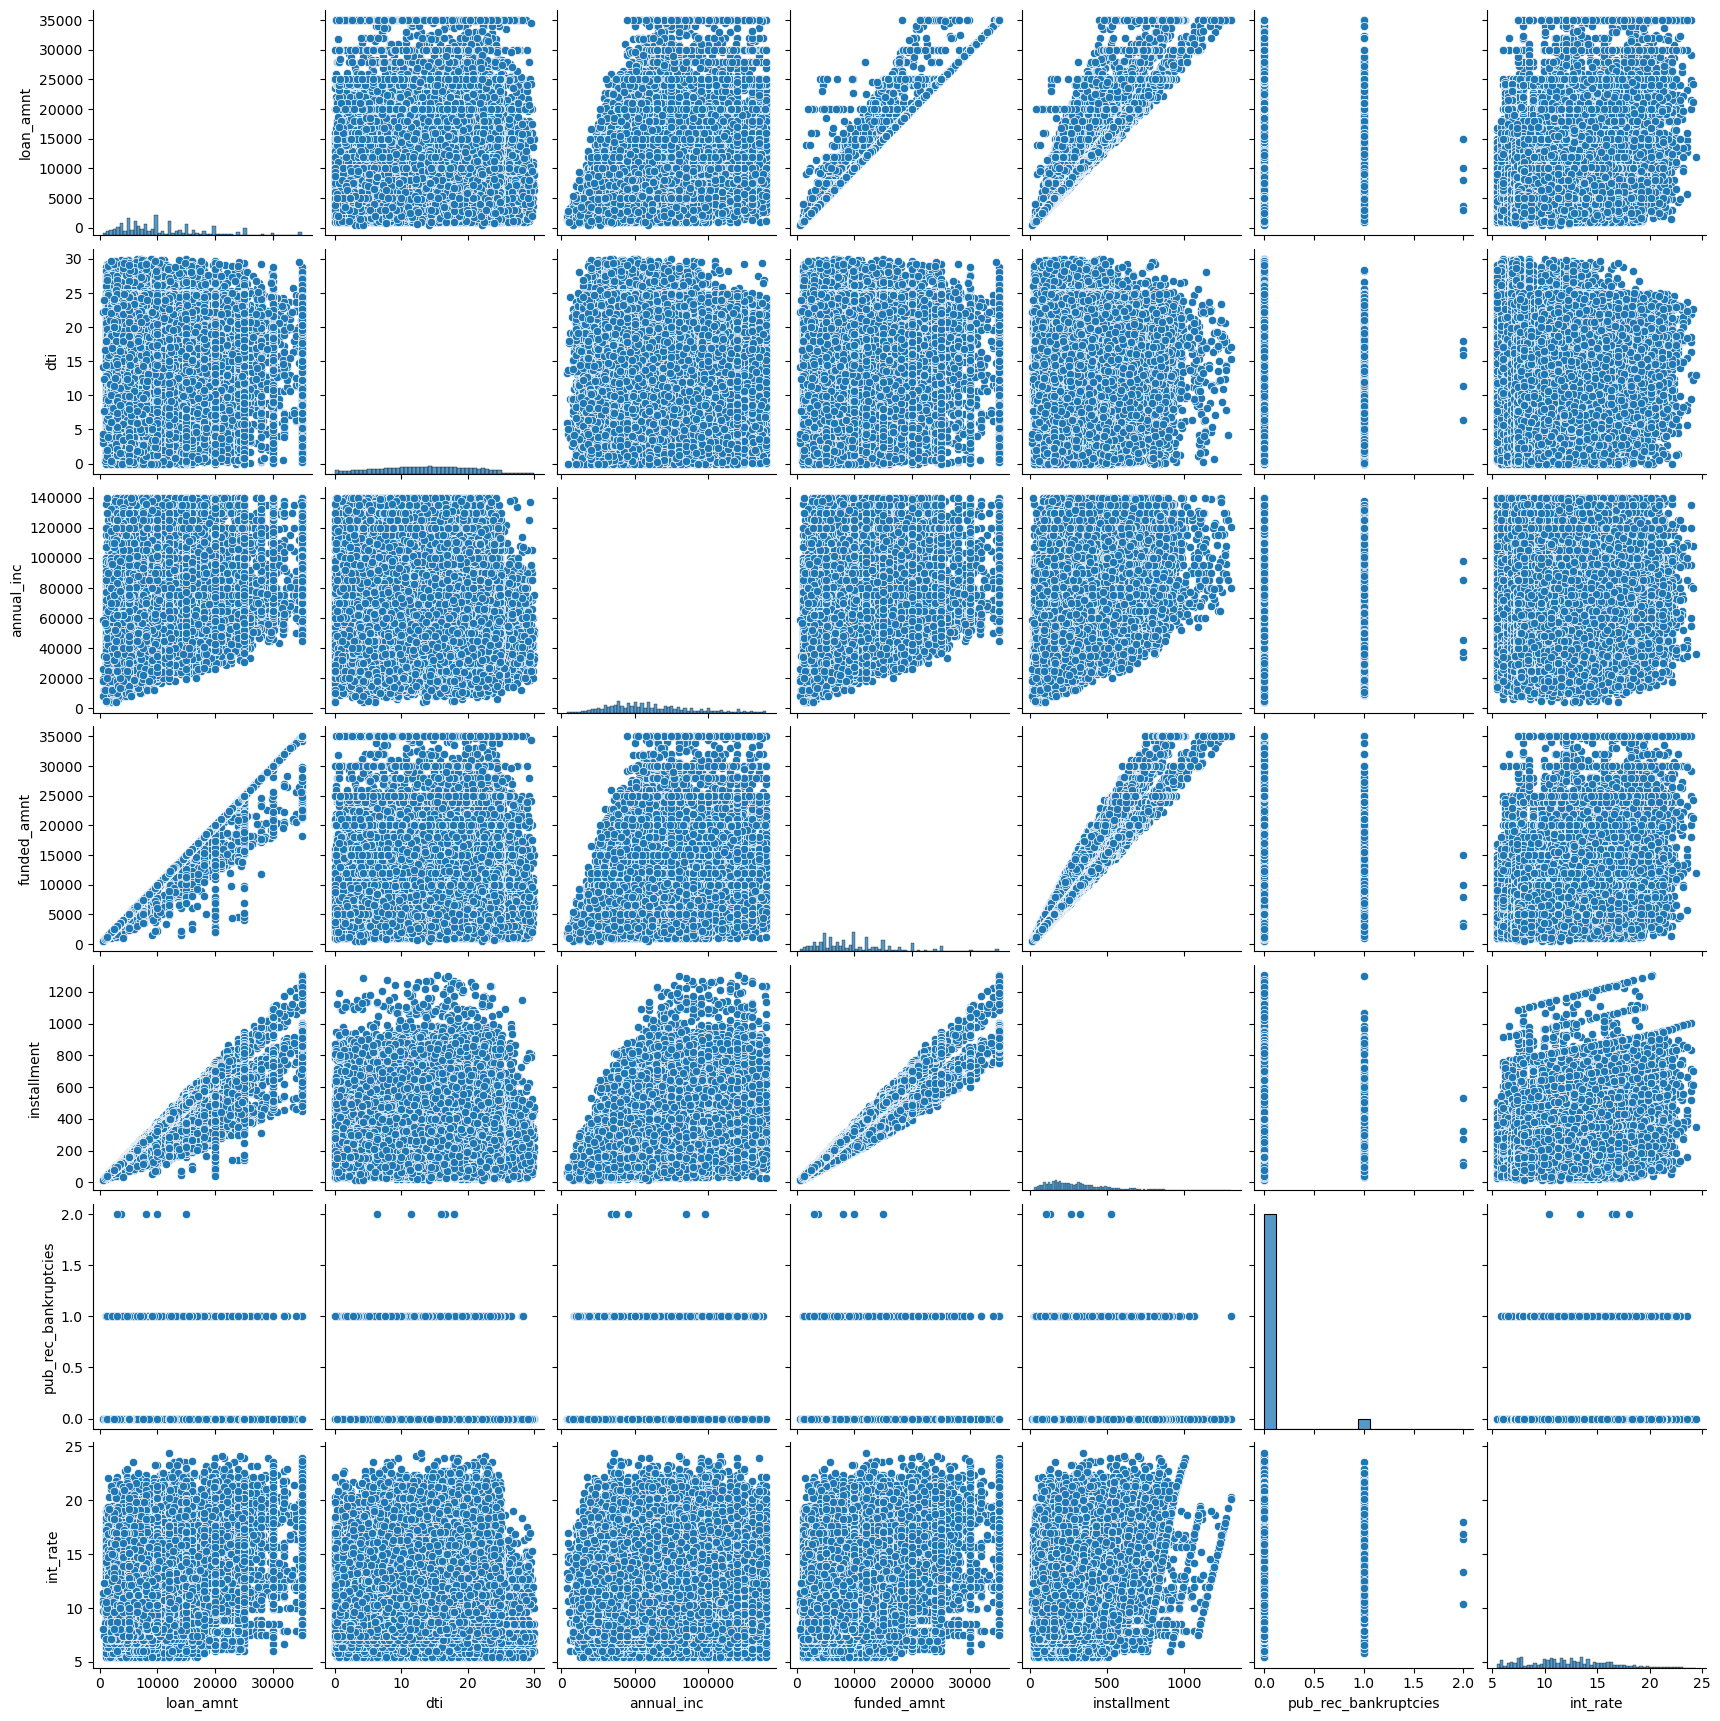

In [145]:
#Pairplots
sns.pairplot(loan[['loan_amnt','dti','annual_inc','funded_amnt','installment','pub_rec_bankruptcies','int_rate']])


The same observation is confirmed by scatter plot as in the heat map

Text(0, 0.5, 'Percentage of Chargedoff records')

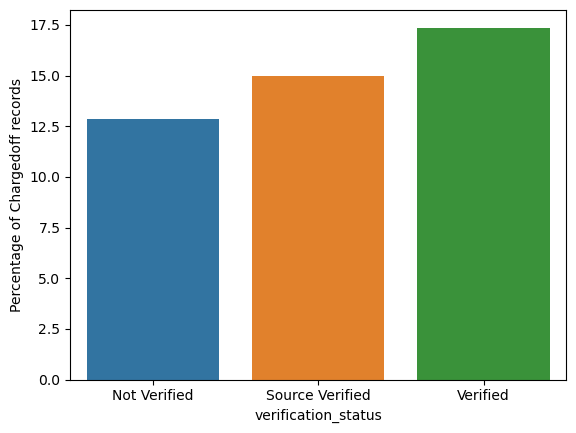

In [179]:
#Plot between charged off percentage and verification status
verification=pd.pivot_table(loan,index='verification_status',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=verification['Charged Off']/(verification['Charged Off']+verification['Fully Paid'])*100,x=verification['verification_status'])
plt.ylabel('Percentage of Chargedoff records')


The verified people have slightly higher percentage charged off as compared to other categories 

Text(0, 0.5, 'Percentage of Chargedoff records')

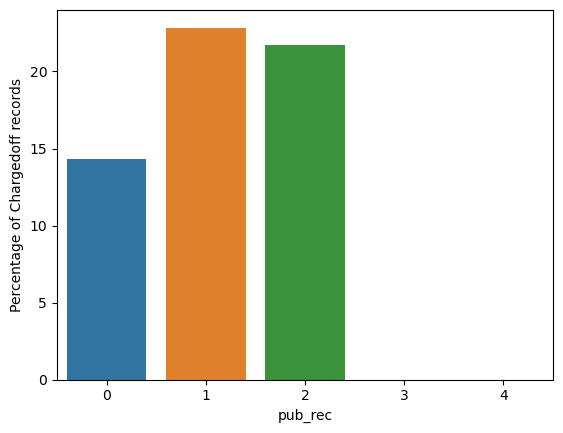

In [178]:
#Plot between charged off percentage and pub_rec
derogatory=pd.pivot_table(loan,index='pub_rec',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=derogatory['Charged Off']/(derogatory['Charged Off']+derogatory['Fully Paid'])*100,x=derogatory['pub_rec'])
plt.ylabel('Percentage of Chargedoff records')

Even though the number of records for deragatory records are low , we cannot ignore that the person is likely to be at default if he/she has bad public record in the past.

Text(0, 0.5, 'Percentage of Chargedoff records')

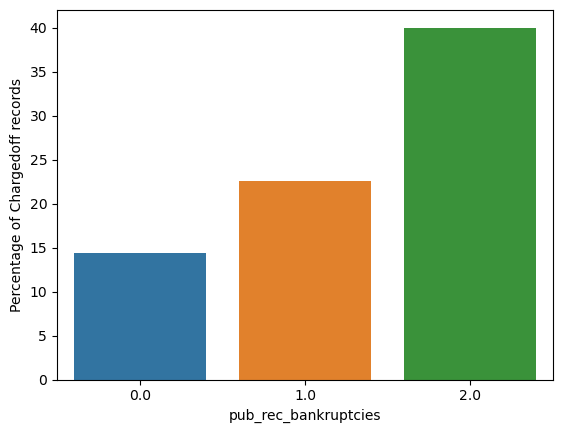

In [177]:
#Plot between charged off percentage and bankruptcies
bankrupt=pd.pivot_table(loan,index='pub_rec_bankruptcies',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=bankrupt['Charged Off']/(bankrupt['Charged Off']+bankrupt['Fully Paid'])*100,x=bankrupt['pub_rec_bankruptcies'])
plt.ylabel('Percentage of Chargedoff records')

Even though the number of records for bankruptcies are low , we cannot ignore that the fact that person is likely to be at default if he/she has been involved in bankruptcies in the past.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fresher'),
  Text(1, 0, 'Average expereince'),
  Text(2, 0, 'Good expereince'),
  Text(3, 0, 'High expereince'),
  Text(4, 0, 'Expert')])

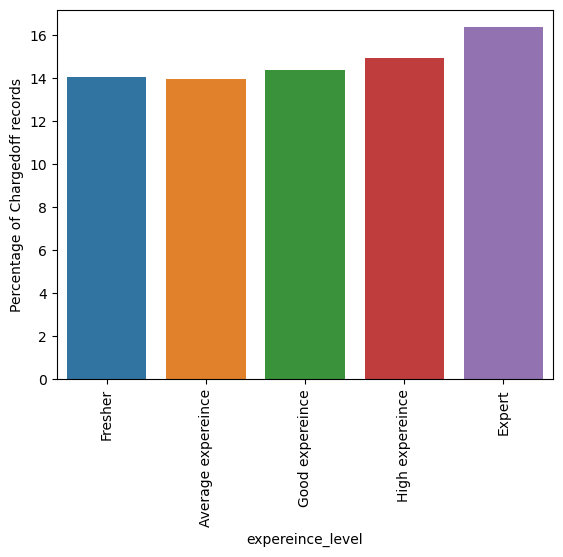

In [175]:
#Plot between charged off percentage and expereince_level
yoe_data=pd.pivot_table(loan,index='expereince_level',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=yoe_data['Charged Off']/(yoe_data['Charged Off']+yoe_data['Fully Paid'])*100,x=yoe_data['expereince_level'])
plt.ylabel('Percentage of Chargedoff records')
plt.xticks(rotation=90)

People who have experience of more than 10 years are likely to be at default.

Text(0, 0.5, 'Percentage of Chargedoff records')

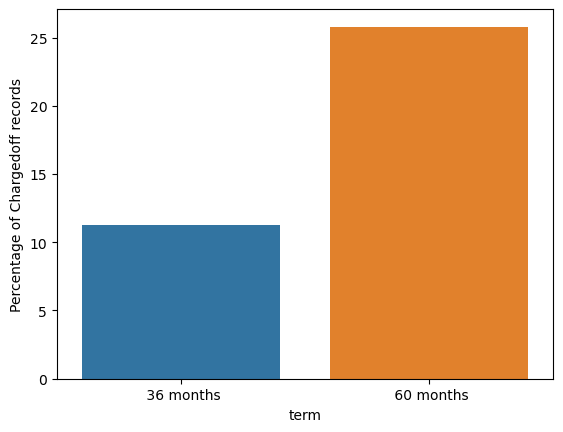

In [176]:
#Plot between charged off percentage and term of a loan
term_data=pd.pivot_table(loan,index='term',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=term_data['Charged Off']/(term_data['Charged Off']+term_data['Fully Paid'])*100,x=term_data['term'])
plt.ylabel('Percentage of Chargedoff records')

People who take 60 months tenure for loan repayment are likely to be at default. 

Text(0, 0.5, 'Percentage of Chargedoff records')

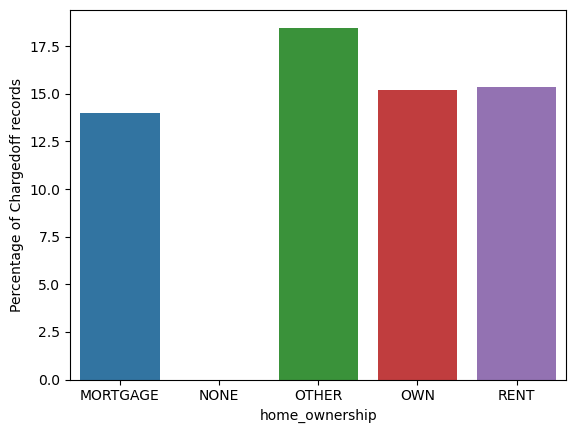

In [181]:
#Plot between charged off percentage and ownership
ownership_data=pd.pivot_table(loan,index='home_ownership',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=ownership_data['Charged Off']/(ownership_data['Charged Off']+ownership_data['Fully Paid'])*100,x=ownership_data['home_ownership'])
plt.ylabel('Percentage of Chargedoff records')

People having 'Mortgage' as the ownership have highest charged off percentage.

Text(0, 0.5, 'Percentage of Chargedoff records')

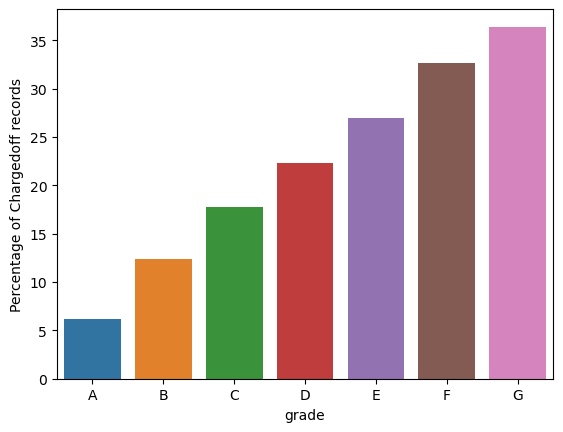

In [172]:
#Plot between charged off percentage and grade
grade_data=pd.pivot_table(loan,index='grade',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
sns.barplot(y=grade_data['Charged Off']/(grade_data['Charged Off']+grade_data['Fully Paid'])*100,x=grade_data['grade'])
plt.ylabel('Percentage of Chargedoff records')

People belonging to Grade 'G' have highest charged off percentage.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'A1'),
  Text(1, 0, 'A2'),
  Text(2, 0, 'A3'),
  Text(3, 0, 'A4'),
  Text(4, 0, 'A5'),
  Text(5, 0, 'B1'),
  Text(6, 0, 'B2'),
  Text(7, 0, 'B3'),
  Text(8, 0, 'B4'),
  Text(9, 0, 'B5'),
  Text(10, 0, 'C1'),
  Text(11, 0, 'C2'),
  Text(12, 0, 'C3'),
  Text(13, 0, 'C4'),
  Text(14, 0, 'C5'),
  Text(15, 0, 'D1'),
  Text(16, 0, 'D2'),
  Text(17, 0, 'D3'),
  Text(18, 0, 'D4'),
  Text(19, 0, 'D5'),
  Text(20, 0, 'E1'),
  Text(21, 0, 'E2'),
  Text(22, 0, 'E3'),
  Text(23, 0, 'E4'),
  Text(24, 0, 'E5'),
  Text(25, 0, 'F1'),
  Text(26, 0, 'F2'),
  Text(27, 0, 'F3'),
  Text(28, 0, 'F4'),
  Text(29, 0, 'F5'),
  Text(30, 0, 'G1'),
  Text(31, 0, 'G2'),
  Text(32, 0, 'G3'),
  Text(33, 0, 'G4'),
  Text(34, 0, 'G5')])

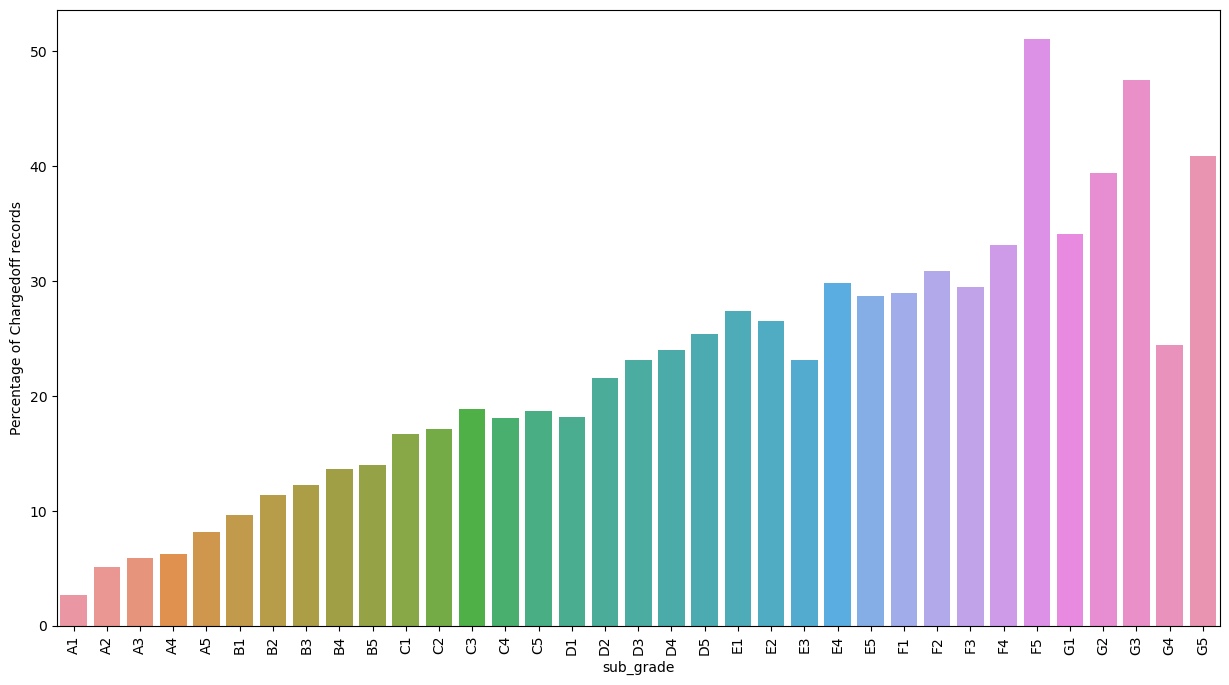

In [168]:
#Plot between charged off percentage and subgrade
subgrade_data=pd.pivot_table(loan,index='sub_grade',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
plt.figure(figsize=(15,8))
sns.barplot(y=subgrade_data['Charged Off']/(subgrade_data['Charged Off']+subgrade_data['Fully Paid'])*100,x=subgrade_data['sub_grade'])
plt.ylabel('Percentage of Chargedoff records')
plt.xticks(rotation=90)

People belonging to subgrade 'F5' have highest charged off percentage.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'educational'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'other'),
  Text(10, 0, 'renewable_energy'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'wedding')])

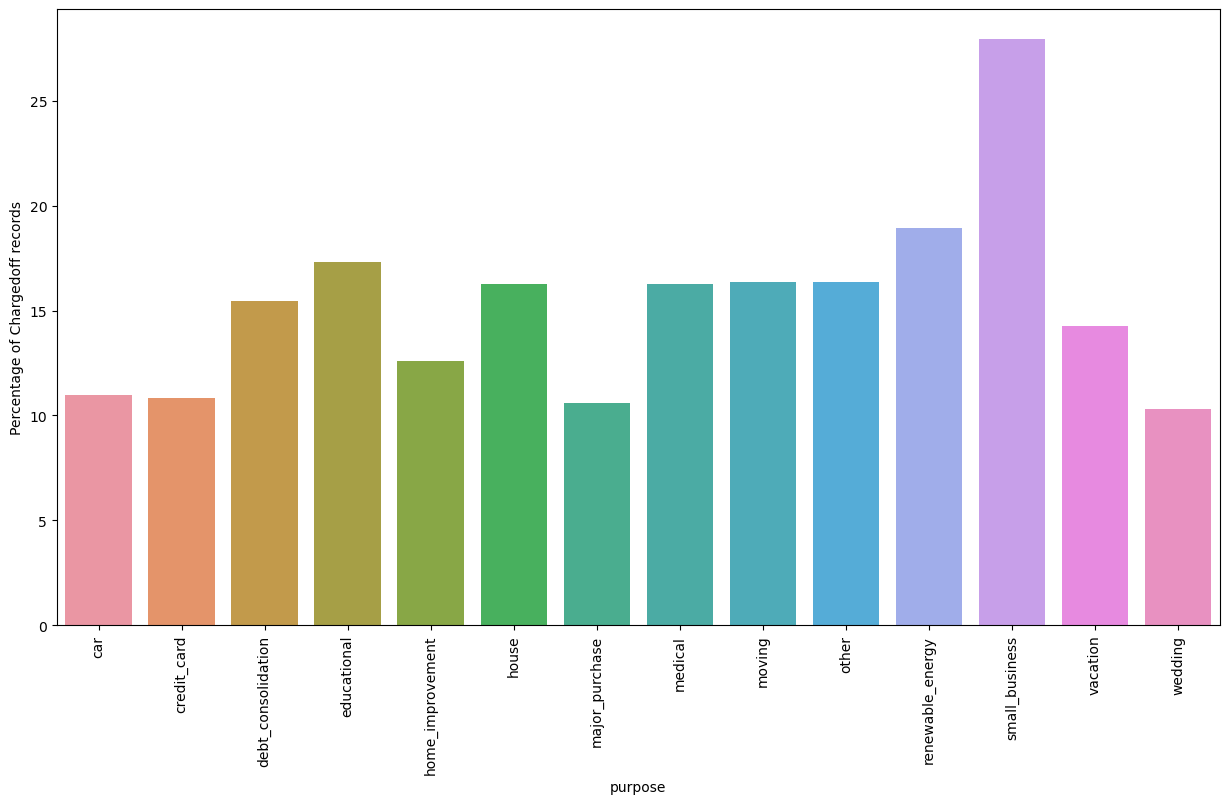

In [167]:
#Plot between charged off percentage and purpose
purpose_data=pd.pivot_table(loan,index='purpose',columns='loan_status',values='loan_amnt',aggfunc='count').reset_index()
plt.figure(figsize=(15,8))
sns.barplot(y=purpose_data['Charged Off']/(purpose_data['Charged Off']+purpose_data['Fully Paid'])*100,x=purpose_data['purpose'])
plt.ylabel('Percentage of Chargedoff records')
plt.xticks(rotation=90)

Most of the people who are at default took loan for the purpose of small_business.

Text(0, 0.5, 'DTI')

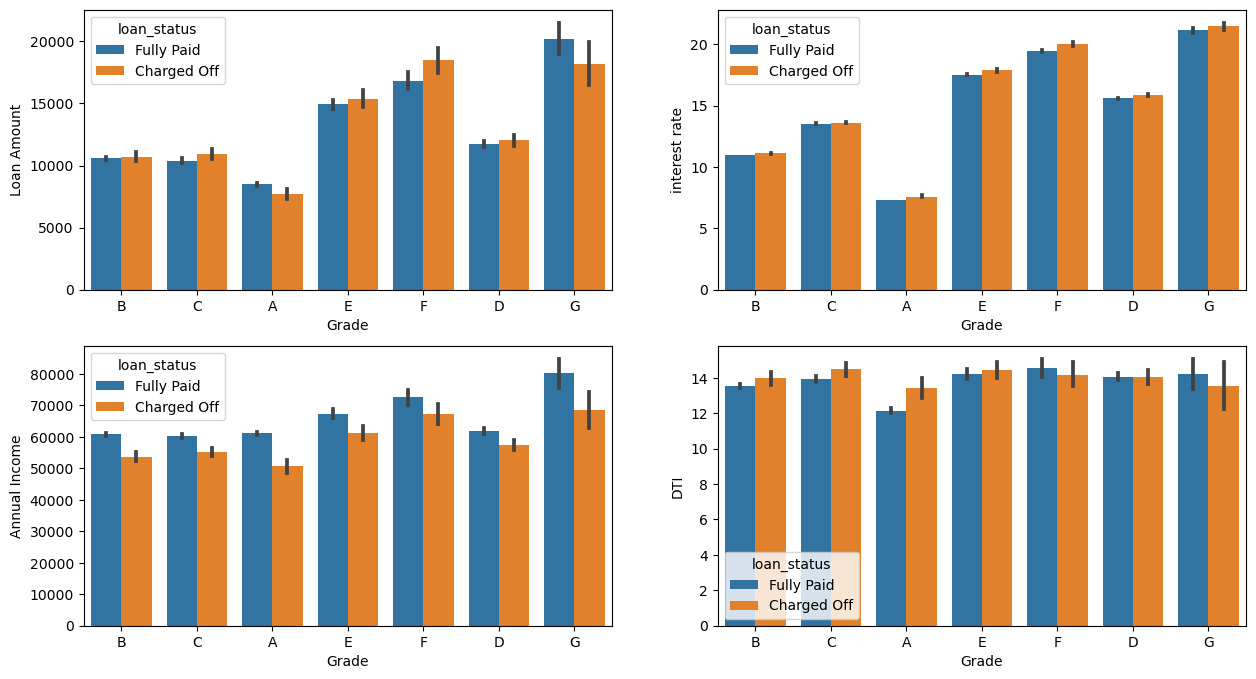

In [156]:
#Loan_amnt vs loan Status vs Grade
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['grade'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Grade')
plt.ylabel('Loan Amount')


#int_rate vs loan Status vs Grade
plt.subplot(2,2,2)
sns.barplot(x=loan['grade'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Grade')
plt.ylabel('interest rate')

#annual_inc vs loan Status vs Grade
plt.subplot(2,2,3)
sns.barplot(x=loan['grade'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Grade')
plt.ylabel('Annual Income')

#dti vs loan Status vs Grade
plt.subplot(2,2,4)
sns.barplot(x=loan['grade'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Grade')
plt.ylabel('DTI')


People belonging to Grade 'G' and 'F' tend to pay high rate of interest and hence are likely to be at default. Maximum people who are at default for higher loan amount belong to grade 'F' and 'G'.

Text(0, 0.5, 'DTI')

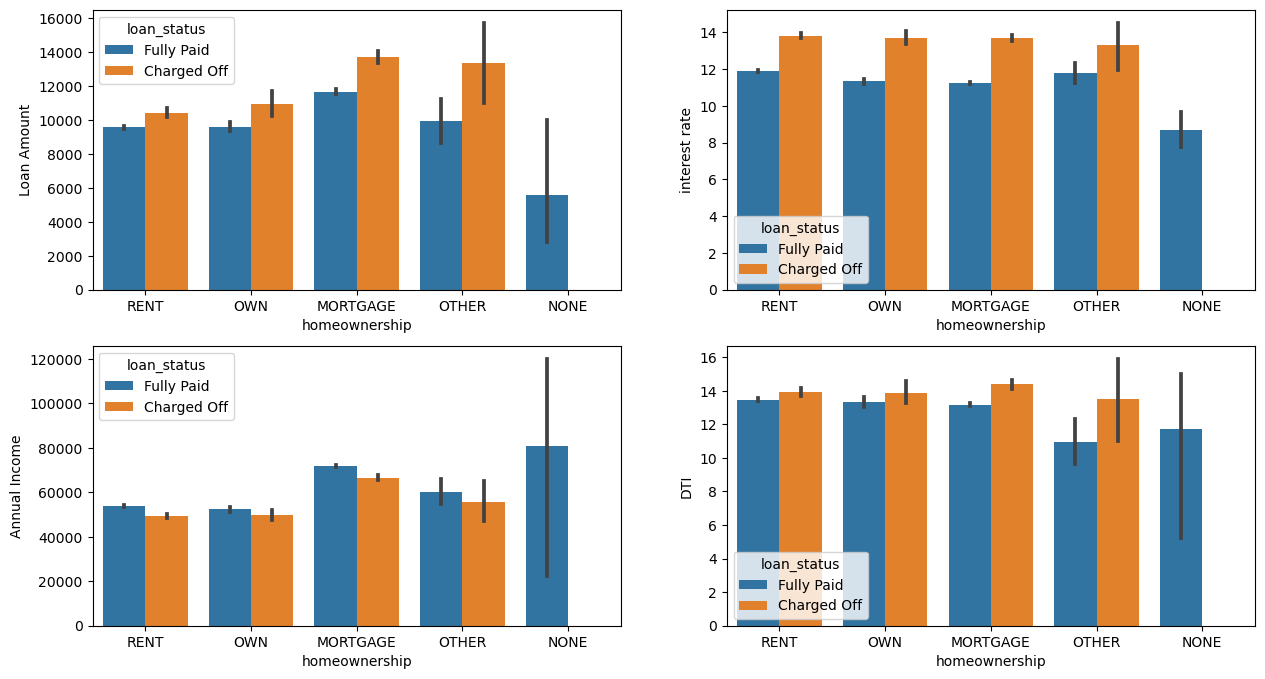

In [157]:
#Loan_amnt vs loan Status vs home_ownership
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['home_ownership'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('homeownership')
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs home_ownership
plt.subplot(2,2,2)
sns.barplot(x=loan['home_ownership'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('homeownership')
plt.ylabel('interest rate')

#annual_inc vs loan Status vs home_ownership
plt.subplot(2,2,3)
sns.barplot(x=loan['home_ownership'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('homeownership')
plt.ylabel('Annual Income')


#dti vs loan Status vs home_ownership
plt.subplot(2,2,4)
sns.barplot(x=loan['home_ownership'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('homeownership')
plt.ylabel('DTI')

People who have ownership as 'Mortgage' are likely to be at default for higher loan amount, higher rate of interest and higher DTI

Text(0, 0.5, 'DTI')

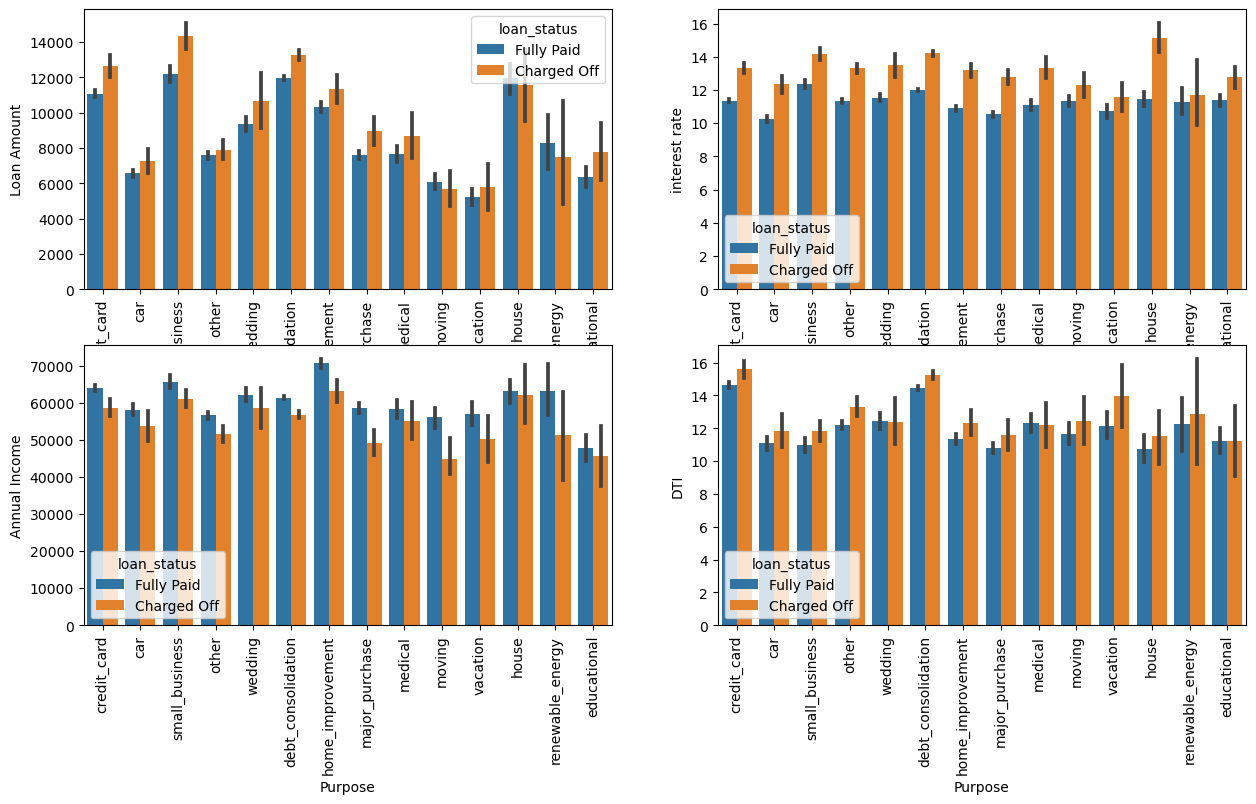

In [158]:
#Loan_Amnt vs loan Status vs purpose


plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['purpose'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs purpose 
plt.subplot(2,2,2)
sns.barplot(x=loan['purpose'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('interest rate')

#annual_inc vs loan Status vs purpose
plt.subplot(2,2,3)
sns.barplot(x=loan['purpose'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Annual Income')

#dti vs loan Status vs purpose
plt.subplot(2,2,4)
sns.barplot(x=loan['purpose'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('DTI')

Most of the people who are at default took loan for the purpose of small_business when the loan amount is higher while when the rate of interest is high then people who took loan for house and home_improvment are likely to be at default.Similarly in case of high DTI ,credit_card is purpose behing people being at default.

Text(0, 0.5, 'DTI')

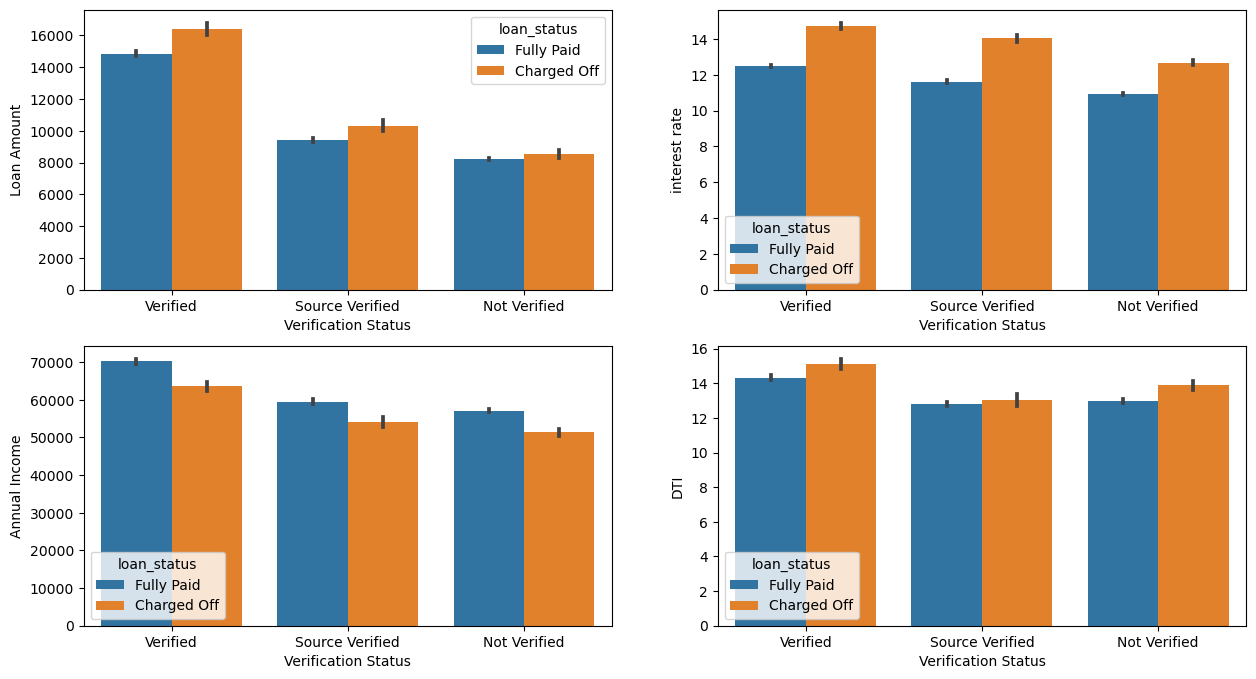

In [159]:
#Loan_amnt vs loan Status vs verification_status
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['verification_status'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')

#int_rate loan Status vs verification_status
plt.subplot(2,2,2)
sns.barplot(x=loan['verification_status'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Verification Status')
plt.ylabel('interest rate')

#annual_inc vs loan Status vs verification_status
plt.subplot(2,2,3)
sns.barplot(x=loan['verification_status'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Verification Status')
plt.ylabel('Annual Income')


#dti vs loan Status vs verification_status
plt.subplot(2,2,4)
sns.barplot(x=loan['verification_status'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Verification Status')
plt.ylabel('DTI')

People who are verified usually tends to be charged off when the loan amount is higher and same happens when the DTI is higher too.

Text(0, 0.5, 'DTI')

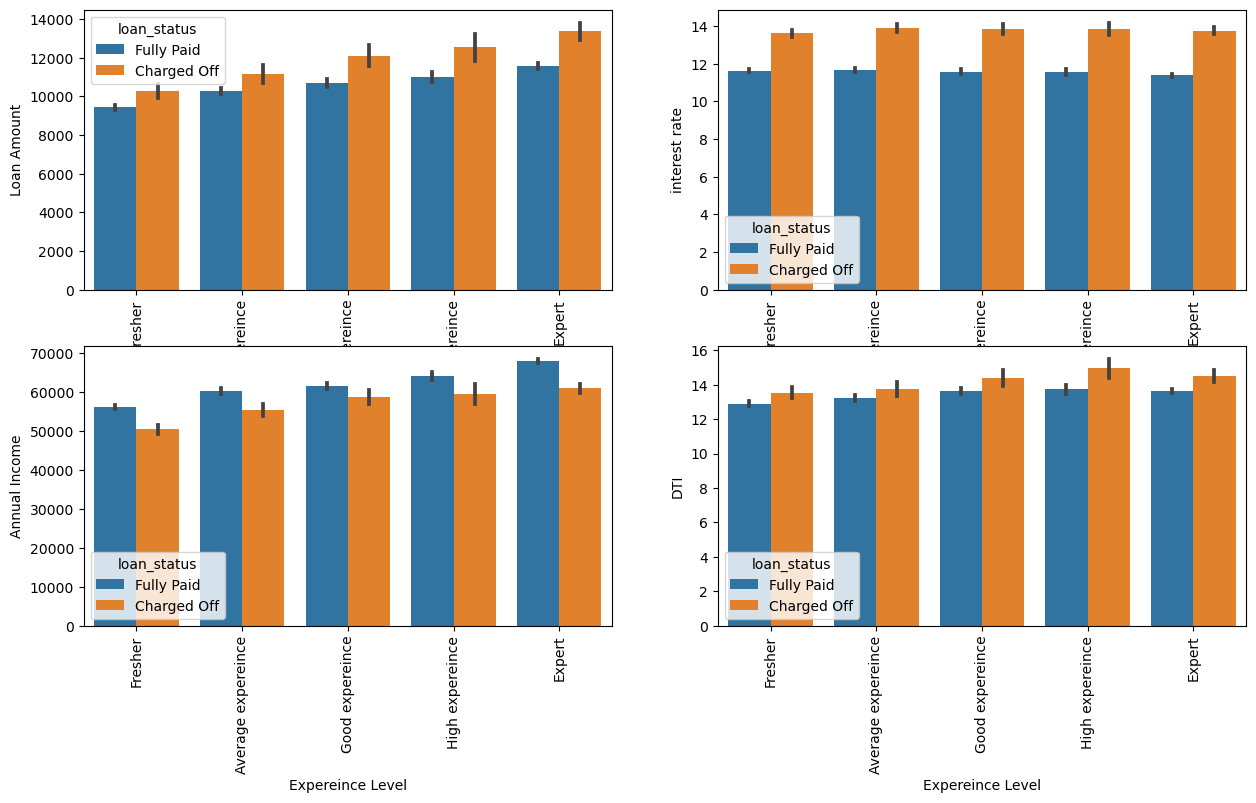

In [160]:
#Loan Amount vs loan Status vs expereince_level
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['expereince_level'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Expereince Level')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs expereince_level
plt.subplot(2,2,2)
sns.barplot(x=loan['expereince_level'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Expereince Level')
plt.xticks(rotation=90)
plt.ylabel('interest rate')

#annual_inc vs loan Status vs expereince_level
plt.subplot(2,2,3)
sns.barplot(x=loan['expereince_level'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Expereince Level')
plt.xticks(rotation=90)
plt.ylabel('Annual Income')

#dti vs loan Status vs expereince_level
plt.subplot(2,2,4)
sns.barplot(x=loan['expereince_level'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Expereince Level')
plt.xticks(rotation=90)
plt.ylabel('DTI')

People who have experience of more than 10 years are ikely to be at default for higher amount and rate of interest.

Text(0, 0.5, 'DTI')

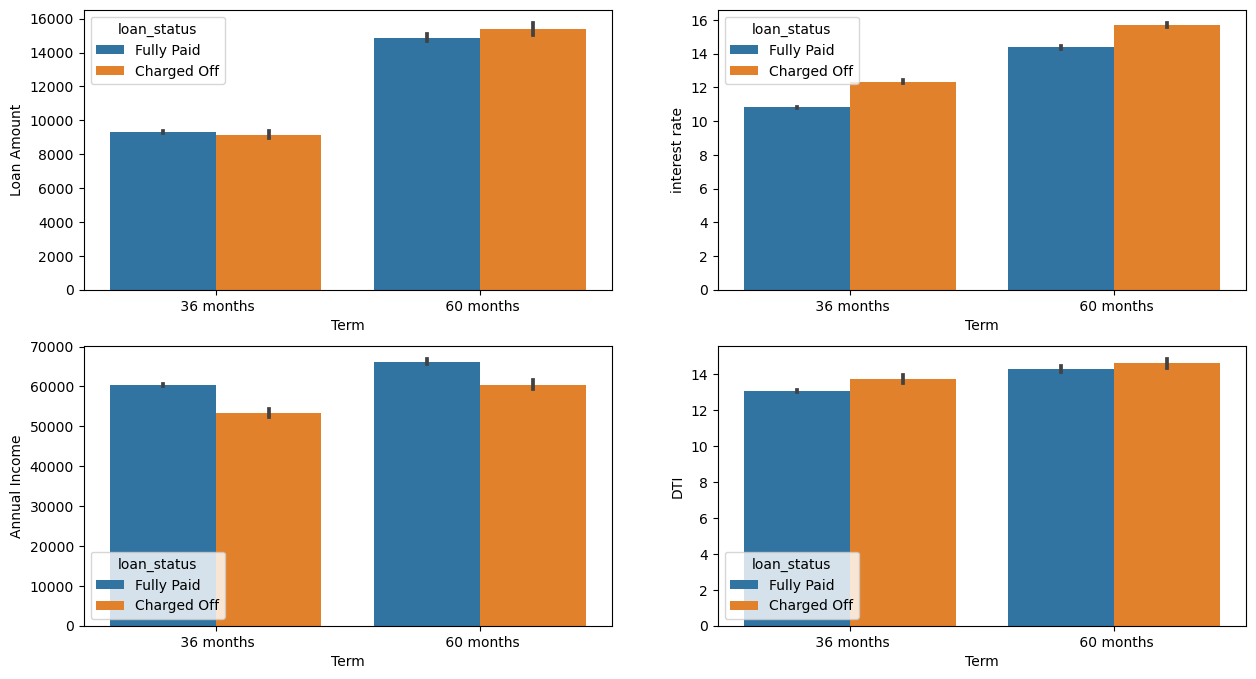

In [161]:
#Loan_amnt vs loan Status vs term
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['term'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Term')
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs term
plt.subplot(2,2,2)
sns.barplot(x=loan['term'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Term')
plt.ylabel('interest rate')

#annual_inc vs loan Status vs term
plt.subplot(2,2,3)
sns.barplot(x=loan['term'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Term')
plt.ylabel('Annual Income')

#dti vs loan Status vs term
plt.subplot(2,2,4)
sns.barplot(x=loan['term'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Term')
plt.ylabel('DTI')

People who took loan for tenure of 60 months are likey to be default for higher amount, rate of interest and DTI.

Text(0, 0.5, 'DTI')

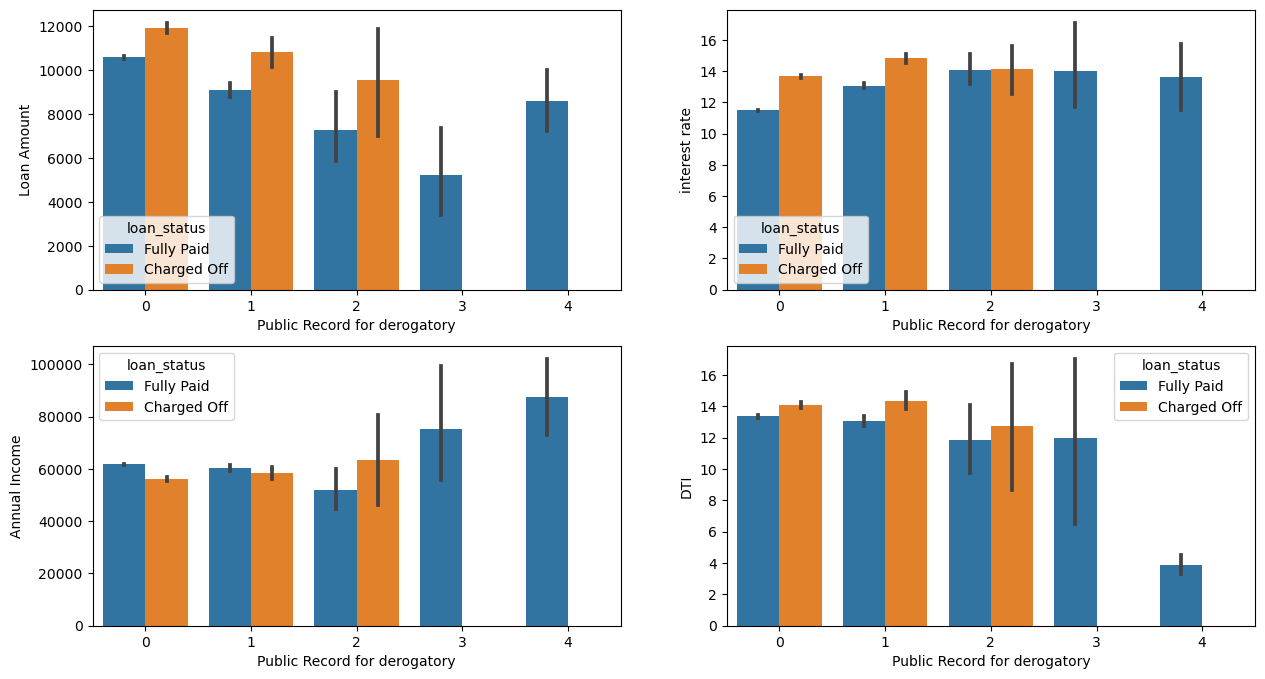

In [162]:
#Loan_amnt vs loan Status vs pub_rec
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['pub_rec'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Public Record for derogatory')
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs pub_rec
plt.subplot(2,2,2)
sns.barplot(x=loan['pub_rec'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Public Record for derogatory')
plt.ylabel('interest rate')

#annual_inc vs loan Status vs pub_rec
plt.subplot(2,2,3)
sns.barplot(x=loan['pub_rec'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Public Record for derogatory')
plt.ylabel('Annual Income')

#dti vs loan Status vs pub_rec
plt.subplot(2,2,4)
sns.barplot(x=loan['pub_rec'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Public Record for derogatory')
plt.ylabel('DTI')

Maximum applicants from charged off group have higher rate of interest have more records for derogatory on their name.
Maximum applicants from charged off group with higher DTI have 1 derogatory record.

Text(0, 0.5, 'DTI')

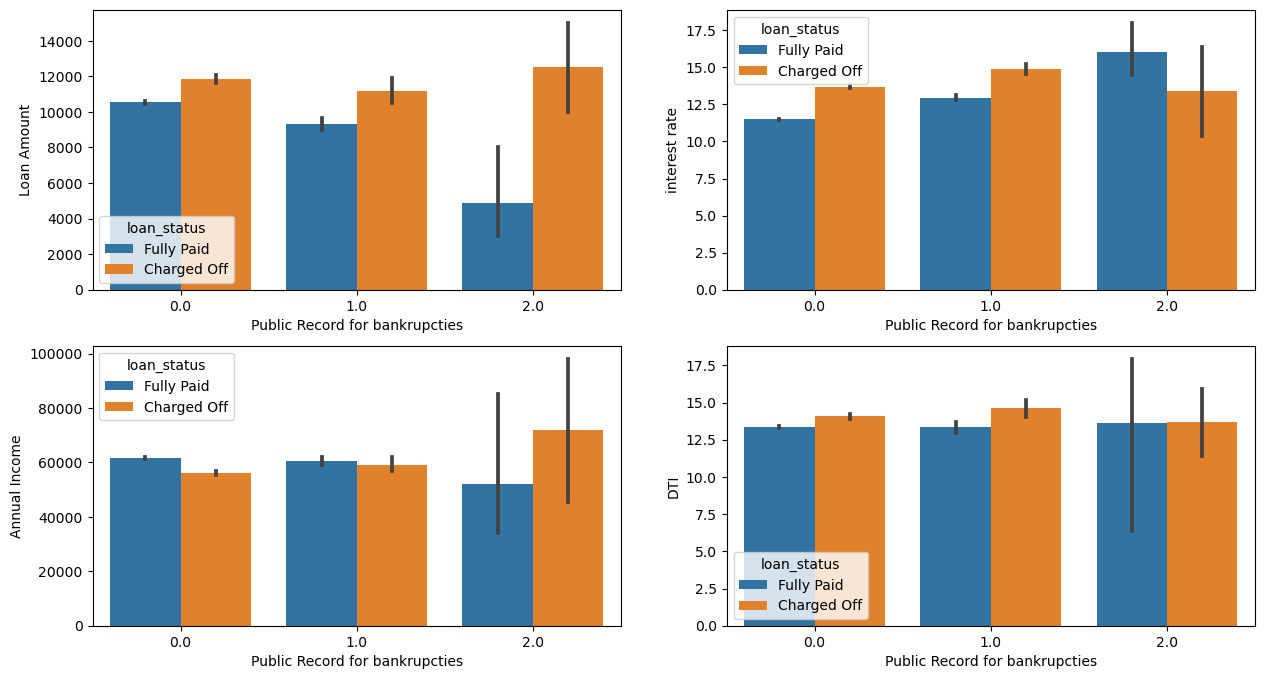

In [163]:
#Loan_amnt vs loan Status vs pub_rec_bankruptcies
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['pub_rec_bankruptcies'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Public Record for bankrupcties')
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs pub_rec_bankruptcies
plt.subplot(2,2,2)
sns.barplot(x=loan['pub_rec_bankruptcies'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Public Record for bankrupcties')
plt.ylabel('interest rate')

#annual_inc loan Status vs pub_rec_bankruptcies
plt.subplot(2,2,3)
sns.barplot(x=loan['pub_rec_bankruptcies'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.xlabel('Public Record for bankrupcties')
plt.ylabel('Annual Income')

#DTI vs loan Status vs pub_rec_bankruptcies
plt.subplot(2,2,4)
sns.barplot(x=loan['pub_rec_bankruptcies'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Public Record for bankrupcties')
plt.ylabel('DTI')

Maximum applicants from charged off group have high loan and more bankruptcies records on their name.Maximum applicants from charged off group with higher DTI have 1 bankruptcy record

Text(0, 0.5, 'DTI')

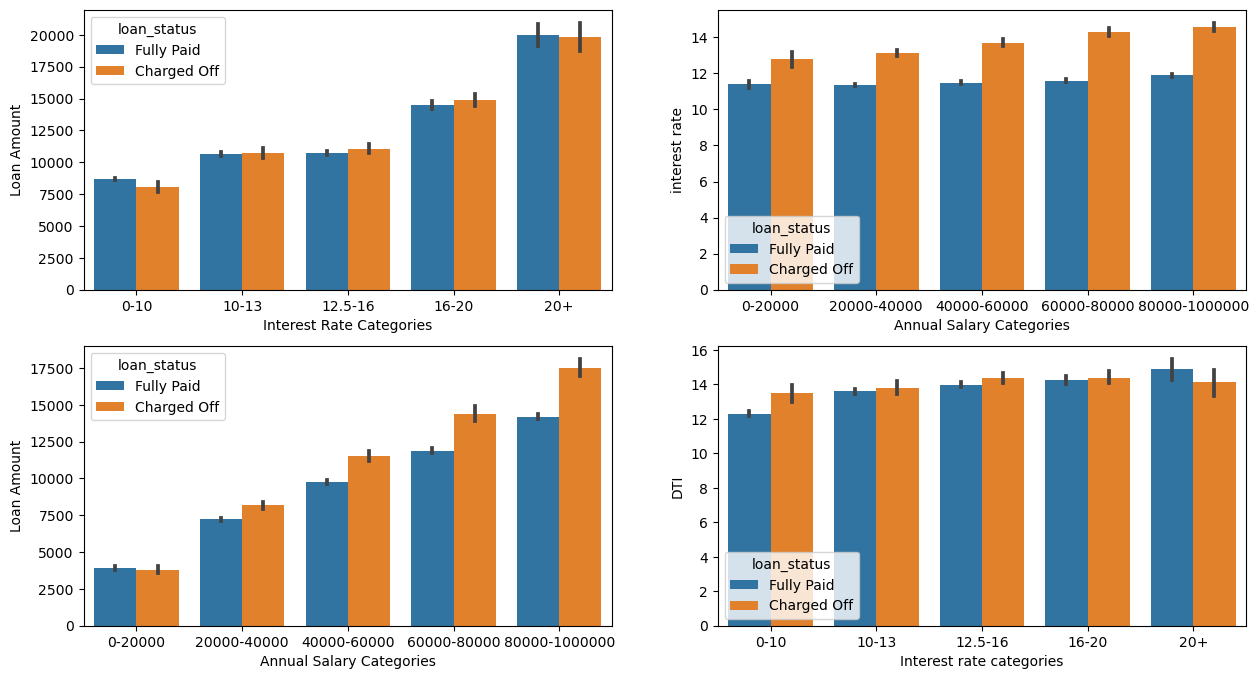

In [196]:
#Loan_amnt vs loan Status vs int_rate_cats
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=loan['int_rate_cats'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Interest Rate Categories')
plt.ylabel('Loan Amount')

#int_rate vs loan Status vs annual_inc_cats
plt.subplot(2,2,2)
sns.barplot(x=loan['annual_inc_cats'],y=loan['int_rate'],hue=loan['loan_status'])
plt.xlabel('Annual Salary Categories')
plt.ylabel('interest rate')

#Loan_amnt vs loan Status vs annual_inc
plt.subplot(2,2,3)
sns.barplot(x=loan['annual_inc_cats'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.xlabel('Annual Salary Categories')
plt.ylabel('Loan Amount')

#int_rate_cats vs loan Status vs dti
plt.subplot(2,2,4)
sns.barplot(x=loan['int_rate_cats'],y=loan['dti'],hue=loan['loan_status'])
plt.xlabel('Interest rate categories')
plt.ylabel('DTI')

As the rate of interest increases with loan amount , people are more likely to be at default. Also, the as the annual salary increases , the loan amount increases and hence people tend to be at default for higher amount.

# From the analysis we can conclude that the main driving variables for a person likely to be at defaults are:
    
    1) Interest rate - When the interest rate is high , a person is higly likely to be at deafult.
    2) Term  - People opting for 60 months tenure are highly likely to be at default.
    3) Grade - People belonging to grade 'G' and 'F' are likely to be at default.
    4) Subgrade - People belonging to Subgrade 'F5' are likely to be at default.
    5) Purpose - People who took loan for credit_card, House and small business are likely to be at default at higher loan        amount.
    6) Ownership - People have ownership of 'Mortgage' are likely to be at default.
    7) Employee Length - People having expereince of more than 10 years are likely to be at default as they seek higher loan     amount which has higher ROI.
    8) Verification Status - People having verification status as Verified are likely to be at default at higher loan amount.
    9) Pub record and bankruptcies - People with Derogatory Public Record and any record for bankruptcies are likely to be at default.